In [137]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns       
import pandas as pd                           # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from iminuit.cost import LeastSquares
from scipy import optimize
from scipy.stats import kstest
from scipy.stats import poisson
from tqdm import tqdm

sys.path.append('../External_Functions')
sys.path.append('../Anders_Biliotek')

from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure
from Anders_Bibliotek import *

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

# Problem 1 - Distributions and probabilities

## 1.1.1

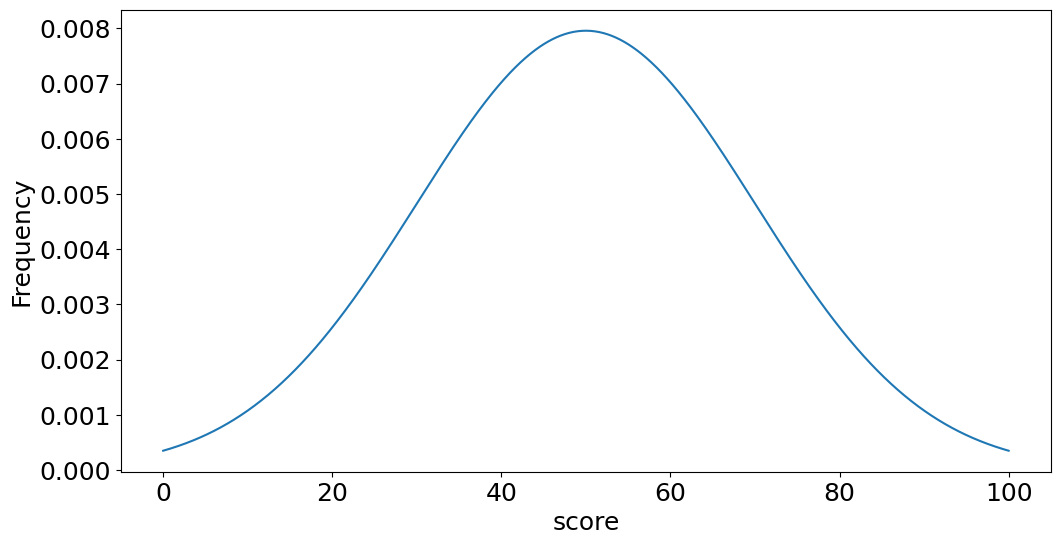

In [138]:
def gauss(x,mu,sigma):
	return 1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2))

x = np.linspace(0,100,1000)
mu = 50
sigma = 20
N_bins = 100

fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(x,gauss(x,mu,sigma), label='histogram' )
ax2.set(xlabel = 'score',ylabel="Frequency");

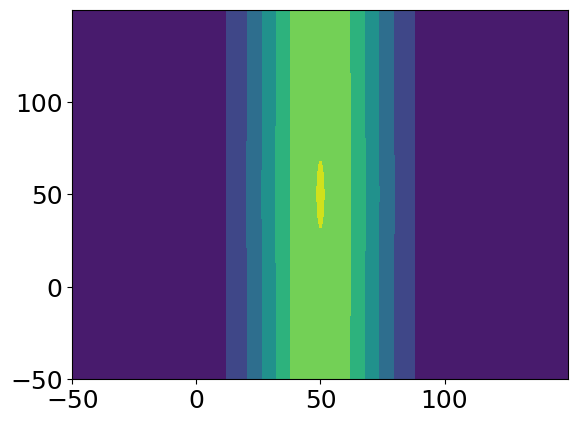

In [142]:
x = np.arange(-50,150,0.1)
y = np.arange(-50,150,0.1)
X, Y = np.meshgrid(x,y,sparse=True)

z = gauss(X,mu,sigma)*(1+gauss(Y,mu,sigma))*0.6
h = plt.contourf(x,y,z)

In [4]:
#The number of students getting a score in the range [55,65] is:

score = []

for i in range(55,65):
	y = gauss(i,mu,sigma)
	score.append(y)

score = np.sum(np.array(score))

score_tot = []

for i in range(0,100):
	y = gauss(i,mu,sigma)
	score_tot.append(y)

score_tot = np.sum(np.array(score_tot))

print(score_tot)

print(f'This means that {score/score_tot} percent of student will get a score in the range [55,65]')

0.3939804011507793
This means that 0.1790040514142624 percent of student will get a score in the range [55,65]


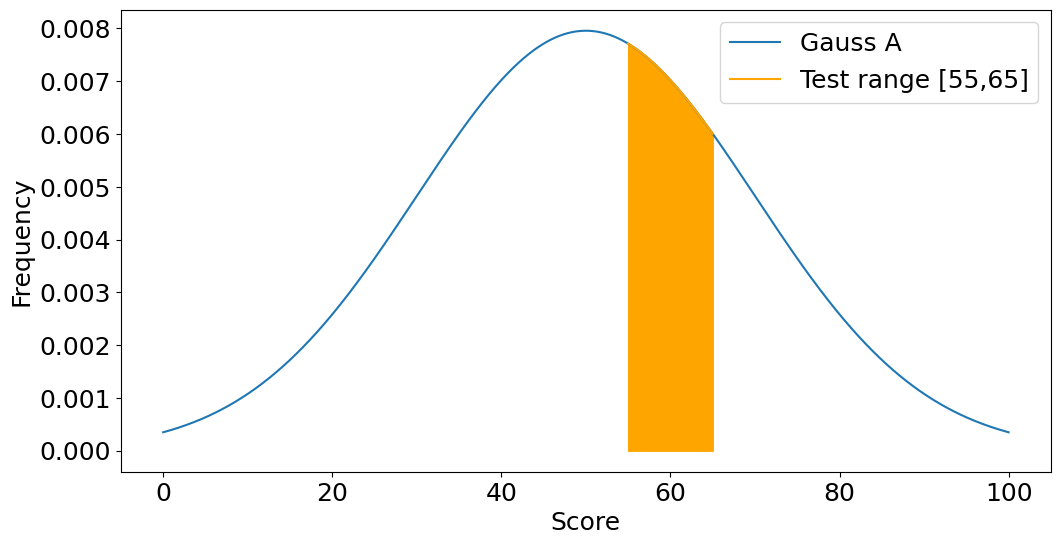

In [5]:

x = np.linspace(0,100,1000)
x2 = np.linspace(55,65,1000)
mu = 50
sigma = 20
N_bins = 100

fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(x,gauss(x,mu,sigma), label='Gauss A' )
ax2.plot(x2,gauss(x2,mu,sigma), label='Test range [55,65]' , color ='orange')
ax2.set(xlabel = 'Score',ylabel="Frequency");
ax2.fill_between(x2,gauss(x2,mu,sigma), color ='orange')
ax2.legend()

## 1.1.2

In [6]:
#The uncertainty on the mean using a 120 B test scores is 

N = 120

B_mean_uncertain = sigma/(np.sqrt(N))

print(f'The uncertainty on the mean with {120} test scores is {np.round(B_mean_uncertain,3)}')

The uncertainty on the mean with 120 test scores is 1.826


## 1.1.3

In [7]:
# If scores correlate with p_A,B = 0.60 then we can use pearsons correlation 

cov = 0.6*sigma*sigma 
print(cov)

240.0


# 1.2

In [8]:
n = 20
p = 0.40

def binomial(r,n,p):
	return stats.binom.pmf(r,n,p)

prob = []

for i in range(11,20):
	y = binomial(i,n,p)
	prob.append(y)

prob = np.array(prob)

print(np.sum(prob))

0.12752123515210026


Text(0, 0.5, 'Frequency')

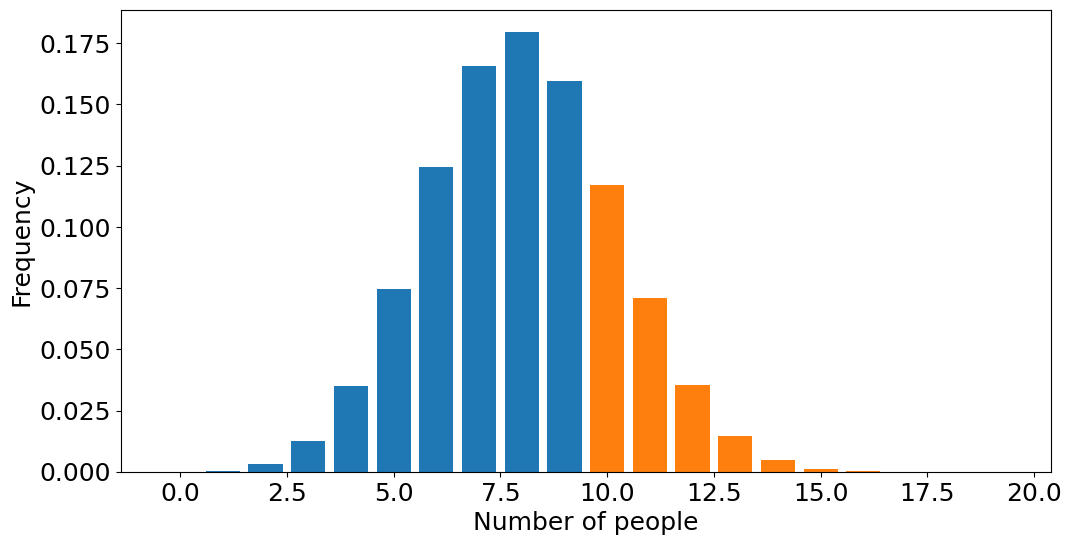

In [9]:
r_values_1 = list(range(10+1))
r_values_2 = list(range(10,20))

dist_1 = [binomial(r,n,p) for r in r_values_1]
dist_2 = [binomial(r,n,p) for r in r_values_2]

fig, ax = plt.subplots(figsize =(12,6))
ax.bar(r_values_1,dist_1)
ax.bar(r_values_2,dist_2)
ax.set_xlabel('Number of people')
ax.set_ylabel('Frequency')

# Problem 2 - Error propagation

## 2.1.1

All uncertainties are calculated with maple

In [144]:
def z_1(x,y):
	return x*y*np.exp(-y)

def z_2(x,y):
	return ((y+1)**3)/(x-1)



In [145]:
samlet_mean = np.mean(z_1(np.linspace(-0.99,0.99),np.linspace(-0.99,0.99)) * z_1(np.linspace(-0.99,0.99),np.linspace(-0.99,0.99)))
mean_z1 = np.mean(z_1(np.linspace(-0.99,0.99),np.linspace(-0.99,0.99)))
mean_z2 = np.mean(z_1(np.linspace(-0.99,0.99),np.linspace(-0.99,0.99)))

cov = samlet_mean - mean_z1*mean_z2

correlation = cov/(0.2060225526*28.65477814)

print(correlation)

0.06729162876503071


## 2.2

In [146]:
obs = np.array([1,2,3,4,5])
result = np.array([5.50,5.61,4.88,5.07,5.26])
results_sig = np.array([0.10,0.21,0.15,0.14,0.13])
truth_value = 5.514
estimated_truth_var = np.sum(result-truth_value)**2/len(result)

## 2.2.1

In [147]:
#The combined results and the uncertainty is 
print(np.mean(result),np.mean(results_sig))

5.264 0.146


## 2.2.2

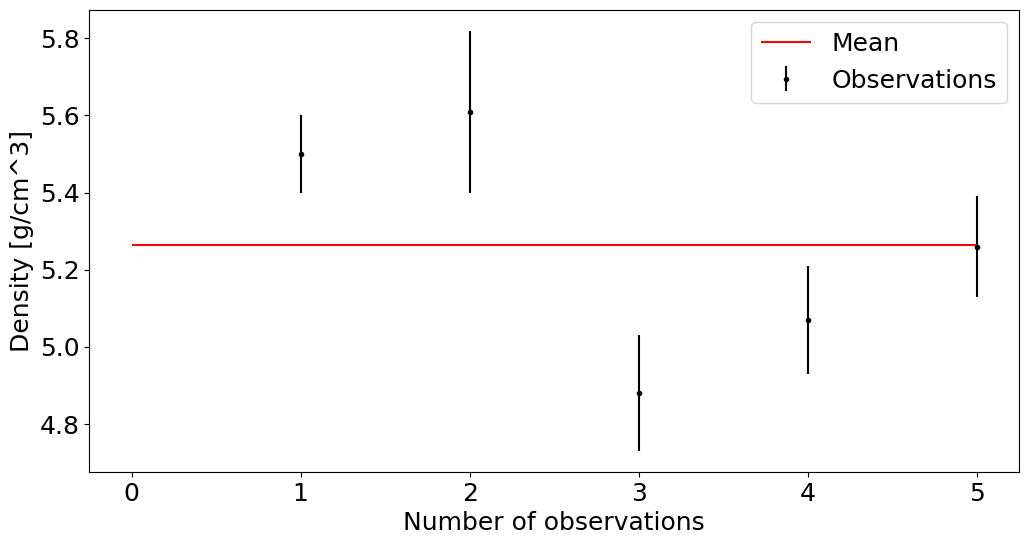

In [148]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(obs,result,results_sig,fmt='.', color = 'black', label = 'Observations')
ax.hlines(np.mean(result),0,5, color = 'red', label = 'Mean') 
ax.set_xlabel('Number of observations')
ax.set_ylabel('Density [g/cm^3]');
ax.legend()

In [149]:
def chi2_self(obs, exp, sig):
	return np.sum(((obs-exp)/sig)**2)

print(chi2_self(result, np.mean(result),results_sig), stats.chi2.sf(chi2_self(result, np.mean(result), results_sig), 4))

16.758999353271882 0.0021528273496319887


## 2.2.3

In [150]:
#To check whether our results is consistent with the real value i can perform a two sample test

print(f'The truth value is {truth_value} +- {np.sqrt(estimated_truth_var)}')
print(f'The mean and its error on the observations is {np.mean(result)} +- {np.mean(results_sig)}')

The truth value is 5.514 +- 0.5590169943749478
The mean and its error on the observations is 5.264 +- 0.146


In [151]:
def two_sample_test(x1,x2,sigma_x1,sigma_x2):
	z = (x1-x2)/(np.sqrt(sigma_x1**2+sigma_x2**2))
	return z

two_sample_test(truth_value,np.mean(result),np.sqrt(estimated_truth_var),np.mean(results_sig))

0.4326995407480435

In [152]:
def t_test(x,y,n_x,n_y):

	s_x = np.sqrt(np.sum(result-x)**2/(n_x-1))

	S = np.sqrt(((n_x-1)*s_x**2)/(n_x+n_y-2))

	return (np.mean(result)-truth_value)/(S*np.sqrt((1/n_x)+(n_y)))

t_test(np.mean(result), truth_value, 5, 1)

-513900647058891.94

# 2.3

In [153]:
a = 1.04
e = 0.71
sig_a = 0.27
sig_e = 0.12

def A(a,e):
	return np.pi*a**2*np.sqrt(1-e**2)

def sig_A(a,e):
	diff_a = 2*np.pi*a*np.sqrt(1-e**2)
	diff_e = (-np.pi*a**2*e)/(np.sqrt(1-e**2))

	return np.sqrt(diff_a**2*sig_a**2+diff_e**2*sig_e**2)


## 2.3.1

In [154]:
#The are for the elipse is
print(f'The area of the elipse is {A(a,e)} +- {sig_A(a,e)}')


The area of the elipse is 2.3928396994627694 +- 1.3086861574841322


## 2.3.2

In [155]:
bounds = np.array([4*a*np.sqrt(2-e**2),np.pi*a*np.sqrt(4-2*e**2)])


def bounds_sig(a,e):
	def bounds_sig1(a,e):

		diff_a = 4*np.sqrt(2-e**2)

		diff_e = (-4*a*e)/(np.sqrt(2-e**2))

		return np.sqrt(diff_a+sig_a**2+diff_e+sig_e**2)

	def bounds_sig2(a,e):

		diff_a = np.pi*np.sqrt(4-2*e**2)

		diff_e = (-2*np.pi*a*e)/(np.sqrt(4-2*e**2))

		return np.sqrt(diff_a+sig_a**2+diff_e+sig_e**2)

	return np.array([bounds_sig1(a,e),bounds_sig2(a,e) ])

print(bounds_sig(a,e))

print(4*a*np.sqrt(2-e**2), np.pi*a*np.sqrt(4-2*e**2))
#The value for C is taken to be the mean of the bounds 
print(f'The value of C is {np.mean(bounds)} +- {np.mean(bounds_sig(a,e))}')

[1.60145955 1.6849241 ]
5.087970817526375 5.6513146837589
The value of C is 5.369642750642638 +- 1.6431918267498422


# Problem 3 - Monte carlo

## 3.1

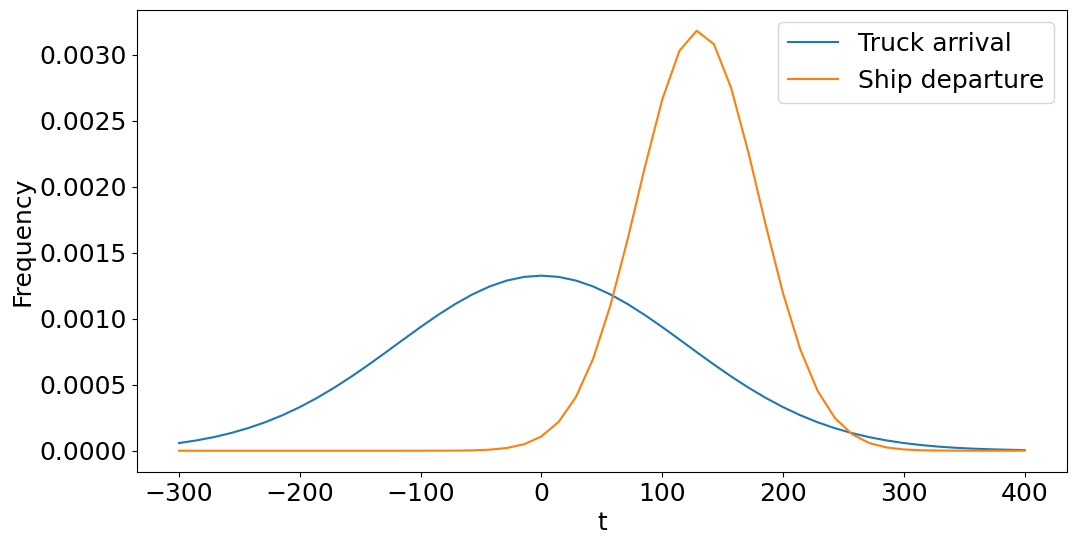

In [21]:
mu1 = 0
mu2 = 0 + 130

sigma1 = 120
sigma2 =  50

left = -300
right = 400

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(np.linspace(left,right),gauss(np.linspace(left,right),mu1,sigma1), label = 'Truck arrival')
ax.plot(np.linspace(left,right),gauss(np.linspace(left,right),mu2,sigma2), label = 'Ship departure')
ax.set_xlabel('t')
ax.set_ylabel('Frequency')
ax.legend()

In [22]:
wait_list = 0
no_wait_list = 0

N_tries = 1000

for i in range(N_tries):
	if stats.norm.rvs(0,120) > stats.norm.rvs(130,50):
		wait_list += 1

	else: 
		no_wait_list += 1

print(wait_list/no_wait_list)

0.19904076738609114


# 3.1.2

In [23]:
delta_list = np.linspace(0,400,100)

average_time = []

n_succes = 0
N_tries = 10000

for delta in tqdm(delta_list):

	wait_time = 0

	for i in range(N_tries):
		container_time = stats.norm.rvs(0,120)
		ship_time = stats.norm.rvs(delta,50)
		if container_time > ship_time:
			wait_time += (60*24-container_time+stats.norm.rvs(delta,50))
			n_succes +=1
			
		else: 
			wait_time += container_time+ship_time
			
			
	average_time.append(wait_time/N_tries)


print(f'The optimal average waiting time is {np.mean(average_time)} +- {np.sqrt(n_succes)}')
print(n_succes/N_tries)

100%|██████████| 100/100 [01:50<00:00,  1.11s/it]

The optimal average waiting time is 354.6823865230336 +- 361.10940170535576
13.04


Text(0, 0.5, 'Average Waiting Time')

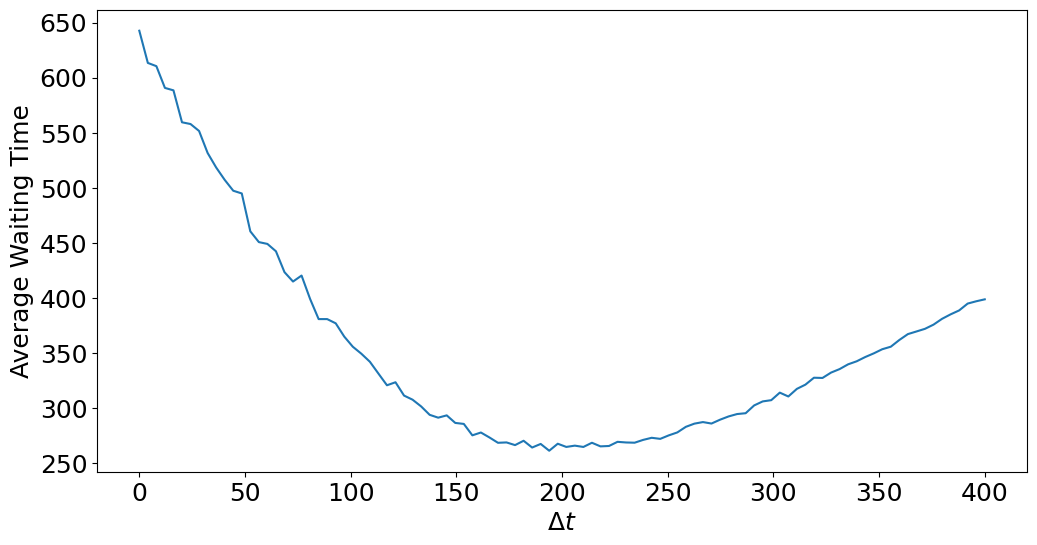

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(delta_list, average_time)
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('Average Waiting Time')

## 3.2

## 3.2.1

Since you cannot invert the function i cannot use the transformation method and therefore i will use accept/reject

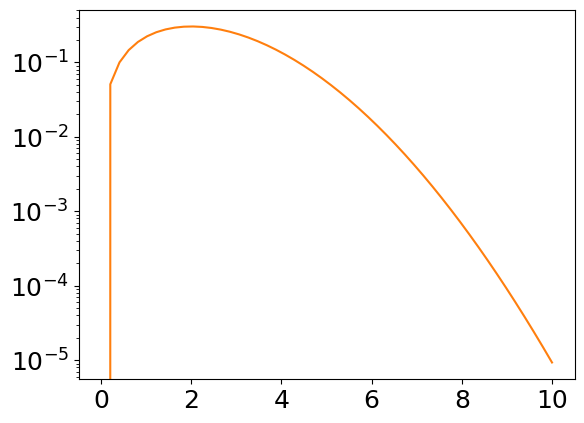

In [25]:
x = np.linspace(0,10)
plt.plot(x,-1/(np.exp(-x**2/(2*2**2))))
plt.plot(x,x/(2**2)*np.exp(-x**2/(2*(2**2))))
plt.yscale('log')

In [26]:
3/(2**2)*np.exp(-3**2/2*(2**2))

1.1422484808534473e-08

## 3.2.2


Integral of f(x) = x, x in [0, 1] is: 	  1.0297 +- 0.0317
The efficiency of the Accept/Reject method used here is: 	 5.15% +/- 0.16%


0.8897256855830417

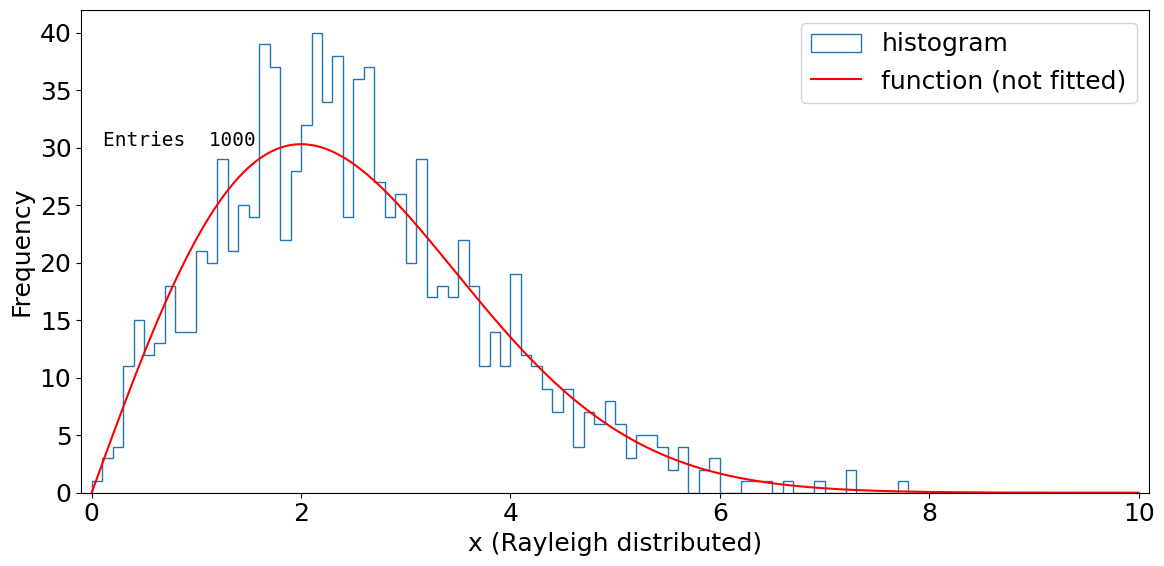

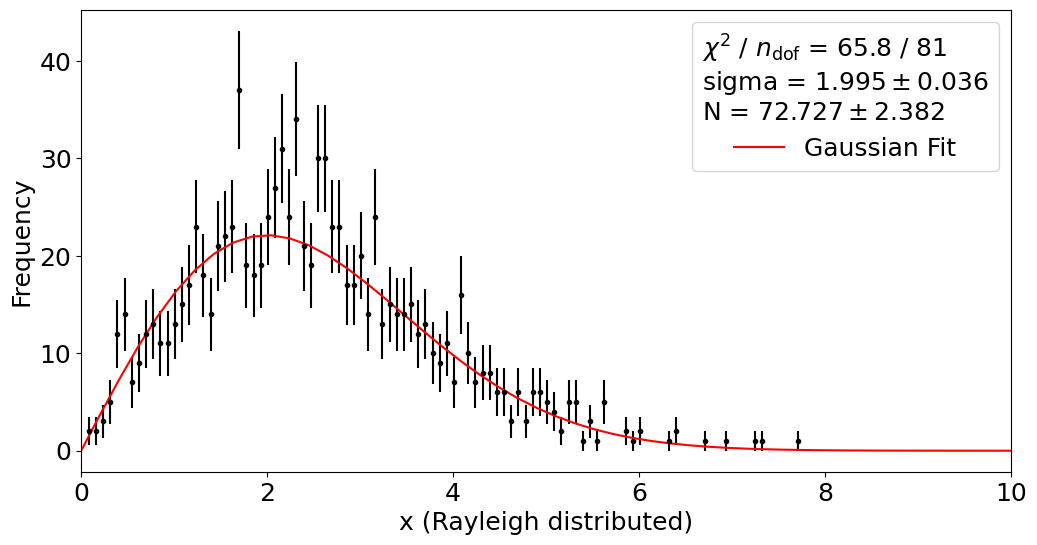

In [27]:
r = np.random
r.seed(42)

save_plots = False   
N_points = 1000      # Number of random points to be produced!

xmin = 0.0
xmax = 10
N_bins = 100

def fx_2x(x) :
    # Normalization is N_points * binwidth:
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N*(x/(2**2)*np.exp(-x**2/(2*(2**2))))

N_try = 0
ymin = 0.0      # Minimum value the function will take!
ymax = 2      # Maximum value the function will take!
x_accepted = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin, xmax)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, ymax)
        
        if (y_test < x_test/(2**2)*np.exp(-x_test**2/(2*(2**2)))):
            break
            
    x_accepted[i] = x_test

# Efficiency
eff = N_points / N_try                        

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral =  eff * (xmax-xmin) * (ymax-ymin)

# Error on integral
eintegral = eff_error * (xmax-xmin) * (ymax-ymin)  

print(f"\nIntegral of f(x) = x, x in [0, 1] is: \t {integral:7.4f} +- {eintegral:6.4f}")
print(f"The efficiency of the Accept/Reject method used here is: \t {eff:.2%} +/- {eff_error:.2%}")
# We normalized the function ahead of time, so we should hope to get a result consistent with unity!

fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax2.set(xlabel="x (Rayleigh distributed)", ylabel="Frequency", xlim=(xmin-0.1, xmax+0.1));

# Plot f(x)
x_axis2 = np.linspace(xmin, xmax, 1000)
y_axis2 = fx_2x(x_axis2)
ax2.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Define the figure text
d2 = {'Entries': len(x_accepted)}

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.75, text2, ax2, fontsize=14)

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()

# Save figure
if save_plots: 
    fig2.savefig("Hist_2x_AcceptRejectMethod.pdf", dpi=600)
    
# Show the figure
fig2

def gauss_fit(x,sigma,N):
    return  N*(x/(sigma**2)*np.exp(-x**2/(2*(sigma**2))))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(x_accepted, bins=N_bins)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss_fit, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2 = Minuit(chi2fit,sigma=2, N=1000)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2.parameters)

minuit_chi2.migrad()


fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2.fval:.1f} / {len(x) - minuit_chi2.nfit}"]
for p, v, e in zip(minuit_chi2.parameters, minuit_chi2.values, minuit_chi2.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")


fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(x,y,sy,fmt ='.', color = 'Black')
ax.plot(np.linspace(0,10), gauss_fit(np.linspace(0,10),*minuit_chi2.values),label = 'Gaussian Fit', color = 'Red')
ax.set_xlim(0,10)
ax.set(xlabel="x (Rayleigh distributed)", ylabel="Frequency");
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(65.8,Ndof_value)

## 3.2.4

come back to this one

In [111]:
errors_sig = []
N_p = np.linspace(50,5000,199)



for i in tqdm(N_p):
	r = np.random
	r.seed(42)
	
	save_plots = False   
	N_points = int(i)      # Number of random points to be produced!

	xmin = 0.0
	xmax = 10
	N_bins = 100

	def fx_2x(x) :
	# Normalization is N_points * binwidth:
		k = (xmax - xmin) / N_bins
		N = N_points * k
		return N*(x/(2**2)*np.exp(-x**2/(2*(2**2))))

	N_try = 0
	ymin = 0.0      # Minimum value the function will take!
	ymax = 2      # Maximum value the function will take!
	x_accepted = np.zeros(N_points)

	for i in range(N_points):
	
		while True:
		
		# Count the number of tries, to get efficiency/integral
			N_try += 1                    
		
		# Range that f(x) is defined/wanted in:
			x_test = r.uniform(xmin, xmax)  
		
		# Upper bound for function values:
			y_test = r.uniform(ymin, ymax)
		
			if (y_test < (x_test/(2**2)*np.exp((-x_test**2)/(2*(2**2))))):
				break
		
		x_accepted[i] = x_test

	def ite_fit(x,sigma,N):
		return  N*(x/(sigma**2)*np.exp((-x**2)/(2*(sigma**2))))

	# Find the x, y and error on y (sy) given the histogram:
	counts, bin_edges = np.histogram(x_accepted, bins=N_bins)
	x = (bin_edges[1:] + bin_edges[:-1])/2
	y = counts
	sy = np.sqrt(counts)
	x = x[y>0]
	sy = sy[y>0]
	y = y[y>0]

	chi2fit = Chi2Regression(ite_fit, x, y, sy)
	# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

	minuit_chi2 = Minuit(chi2fit,sigma=2, N=1000)
	minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits

	chi2_value = minuit_chi2.fval
	N_NotEmptyBin = np.sum(y>0)
	Ndof_value = N_NotEmptyBin - len(minuit_chi2.parameters)

	minuit_chi2.migrad()

	errors_sig.append(minuit_chi2.errors[0]);

100%|██████████| 199/199 [01:16<00:00,  2.60it/s]


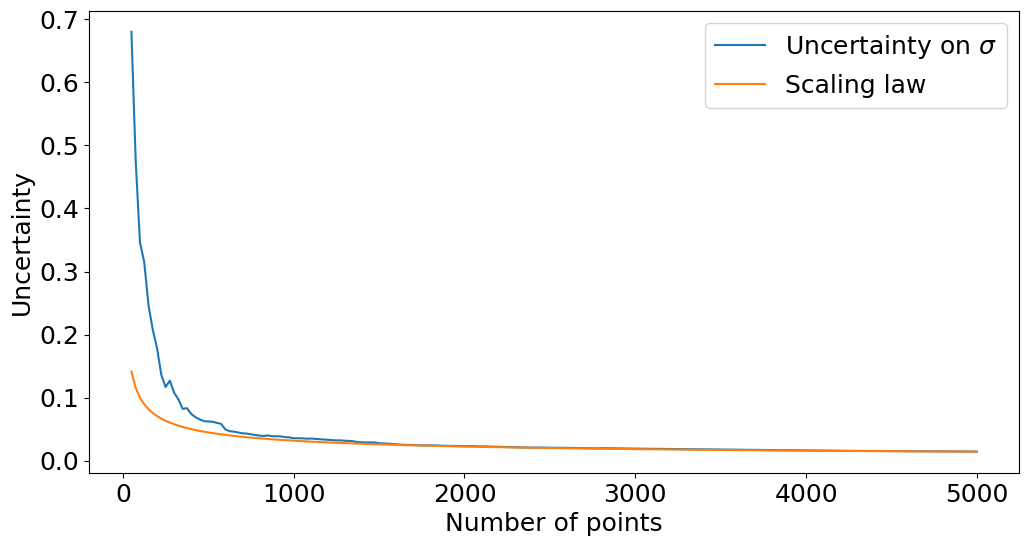

In [117]:
errors_sig = np.array(errors_sig)
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(N_p,errors_sig, label = 'Uncertainty on $\sigma$')
ax.plot(N_p,1/np.sqrt(N_p), label = 'Scaling law')
ax.set_xlabel('Number of points')
ax.set_ylabel('Uncertainty')
ax.legend()

In [113]:
kstest(errors_sig, 1/np.sqrt(N_p))

KstestResult(statistic=0.06532663316582915, pvalue=0.7908399305903222)

# Problem 4 - Statistical tests

In [118]:
def read_grip(filename):
	dat = pd.read_csv(filename, sep = ',', header = 1, names = ["ID", "Temp", "BloodP", "Age", "Status"]) 
	return dat

Anoroc = read_grip("data_AnorocDisease.csv")
id = Anoroc["ID"]
temp = Anoroc["Temp"]
bloodp = Anoroc["BloodP"]
age = Anoroc["Age"]
status = Anoroc["Status"]

In [119]:
controlid = id[0:800]
control_temp = temp[0:800]
control_bloodp = bloodp[0:800]
control_age = age[0:800]
control_status = status[0:800]

unknownid = id[800:1000]
unknown_temp = temp[800:1000]
unknown_bloodp = bloodp[800:1000]
unknown_age = age[800:1000]
unknown_status = status[800:1000]

healthy_control = control_status[control_status==1]
ill_control = control_status[control_status==0]

## 4.1.1

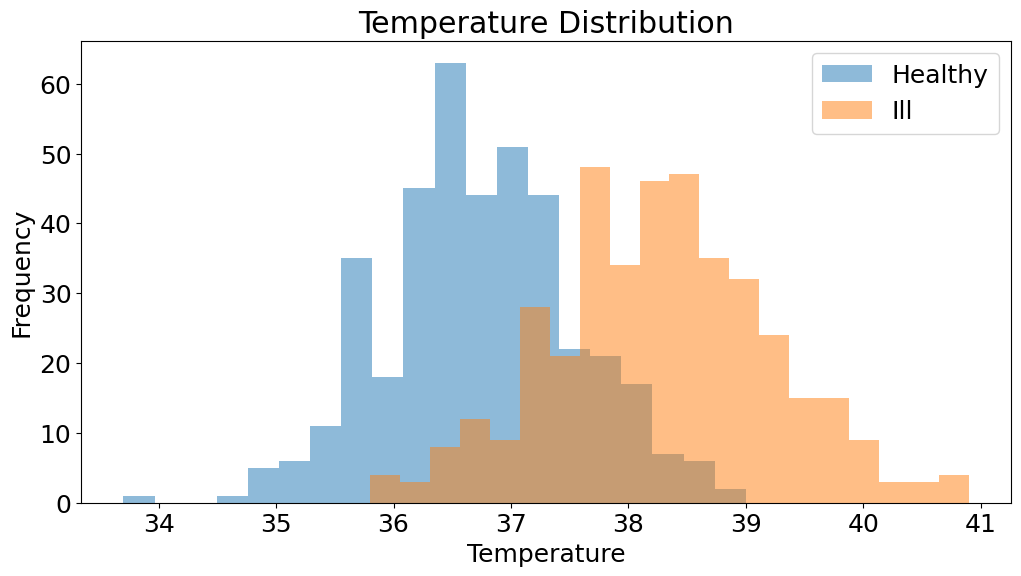

In [120]:
N_bins = 20

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(control_temp[control_status==0],N_bins, alpha = 0.5, label = 'Healthy');
ax.hist(control_temp[control_status==1],N_bins,alpha = 0.5, label = 'Ill');
ax.set_title('Temperature Distribution')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
ax.legend()

0.0


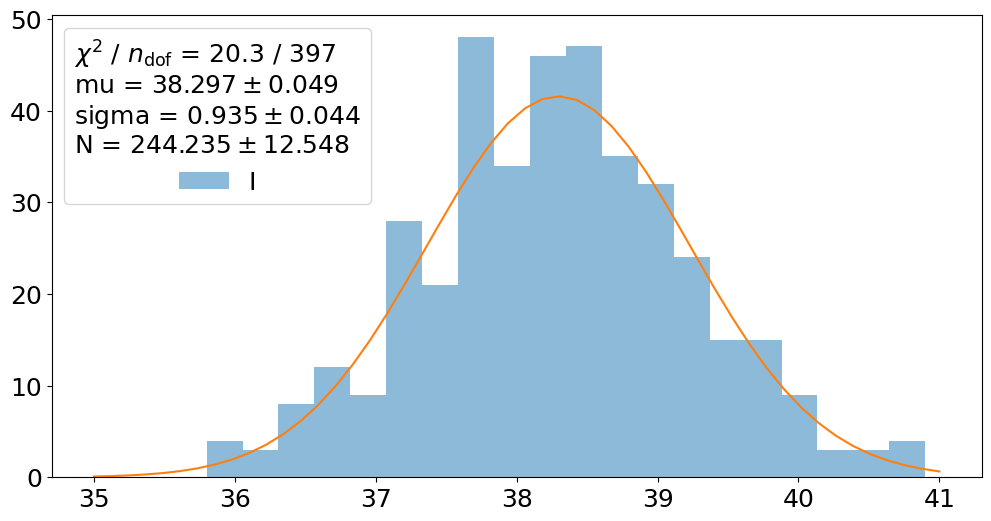

In [132]:
def gauss(x,mu,sigma, N):
	return N*(1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2)))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(control_temp[control_status==1], bins=20)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F = Minuit(chi2fit,mu=38, sigma=1, N=50)
minuit_chi2_F.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F.parameters)

minuit_chi2_F.migrad()

#stats.chi2.sf(1,Ndof_value)

fit_info1 = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F.fval:.1f} / {len(control_temp[control_status==1]) - minuit_chi2_F.nfit}"]
for p, v, e in zip(minuit_chi2_F.parameters, minuit_chi2_F.values, minuit_chi2_F.errors):
	fit_info1.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(35,41)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(control_temp[control_status==1], bins=20, alpha = 0.5, label='I');

ax.plot(x, gauss(x,*minuit_chi2_F.values))
ax.legend()
ax.legend(title="\n".join(fit_info1));


In [135]:

print(gauss(40,*minuit_chi2_F.values)/np.max(gauss(x,*minuit_chi2_F.values)))

0.1905911774342966


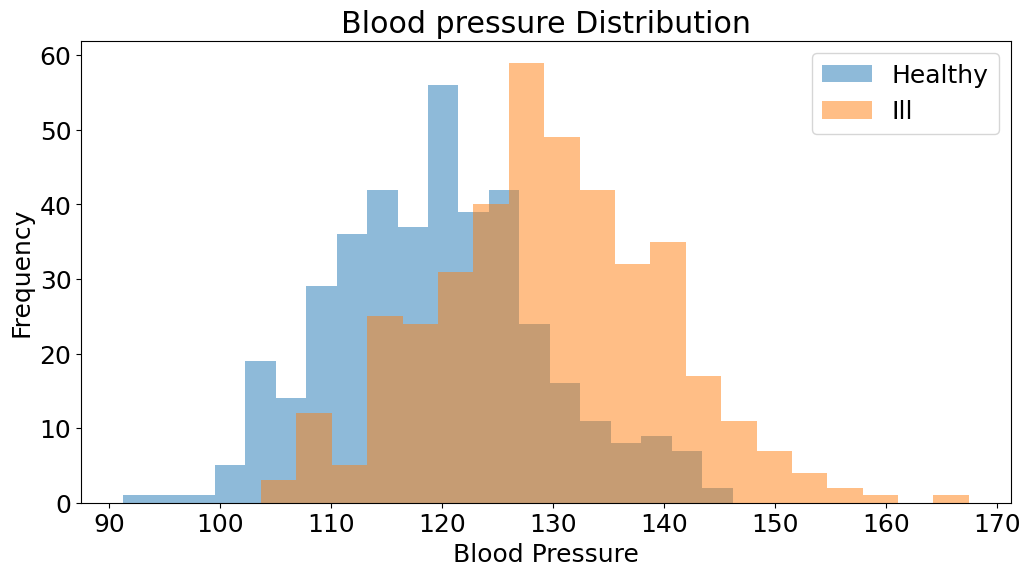

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(control_bloodp[control_status==0],N_bins,alpha = 0.5, label = 'Healthy');
ax.hist(control_bloodp[control_status==1],N_bins,alpha = 0.5, label = 'Ill');
ax.set_title('Blood pressure Distribution')
ax.set_xlabel('Blood Pressure')
ax.set_ylabel('Frequency')
ax.legend()

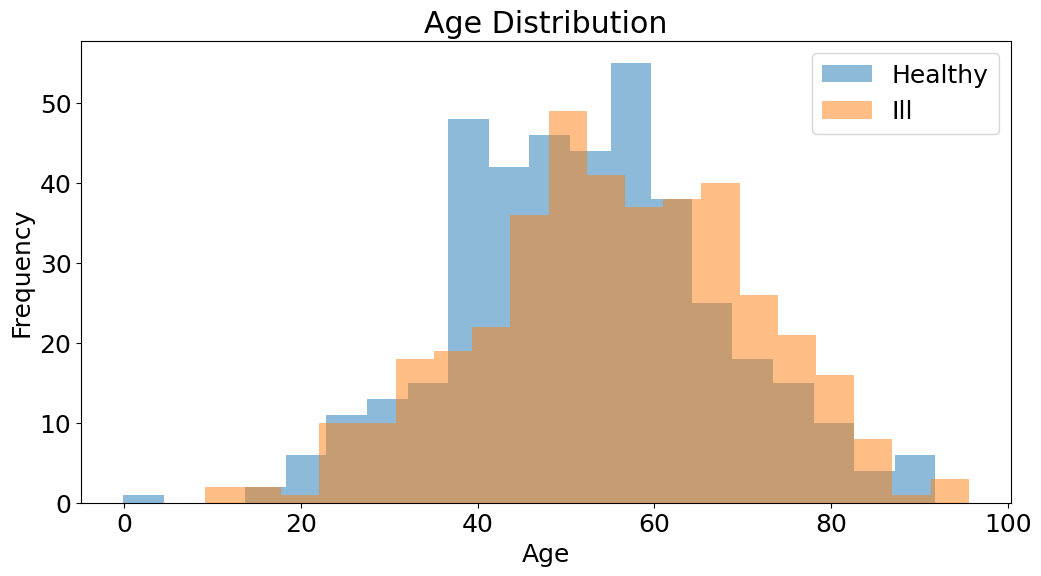

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(control_age[control_status==0],N_bins,alpha = 0.5, label = 'Healthy');
ax.hist(control_age[control_status==1],N_bins,alpha = 0.5, label = 'Ill');
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend()

## 4.1.2

In [35]:
print(len(control_age[control_status==0]), len(control_age[control_status==0]))

399 399


In [36]:
kstest(control_age[control_status==0],control_age[control_status==1])

KstestResult(statistic=0.1319423558897243, pvalue=0.0015472615134935947)

## 4.1.3

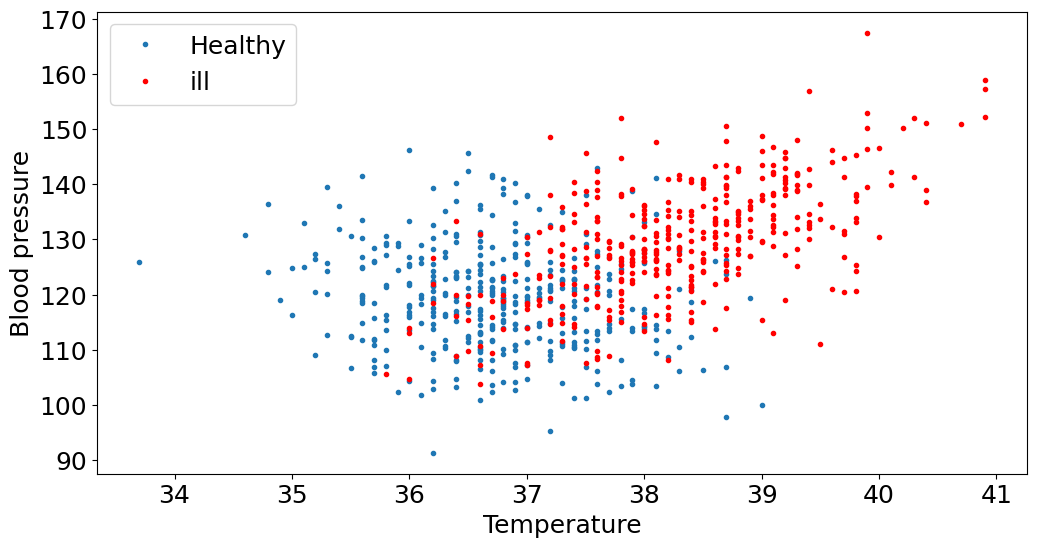

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(control_temp[control_status==0],control_bloodp[control_status==0],'.', label = 'Healthy');
ax.plot(control_temp[control_status==1],control_bloodp[control_status==1],'.',color = 'red', label = 'ill');
ax.set_xlabel('Temperature')
ax.set_ylabel('Blood pressure')
ax.legend()

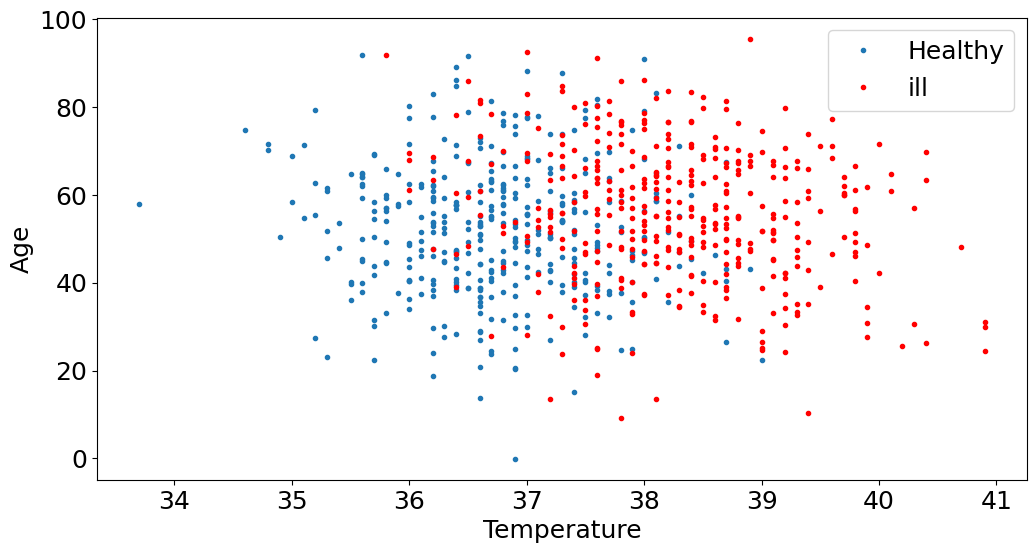

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(control_temp[control_status==0],control_age[control_status==0],'.', label = 'Healthy');
ax.plot(control_temp[control_status==1],control_age[control_status==1],'.',color = 'red', label = 'ill');
ax.set_xlabel('Temperature')
ax.set_ylabel('Age')
ax.legend()

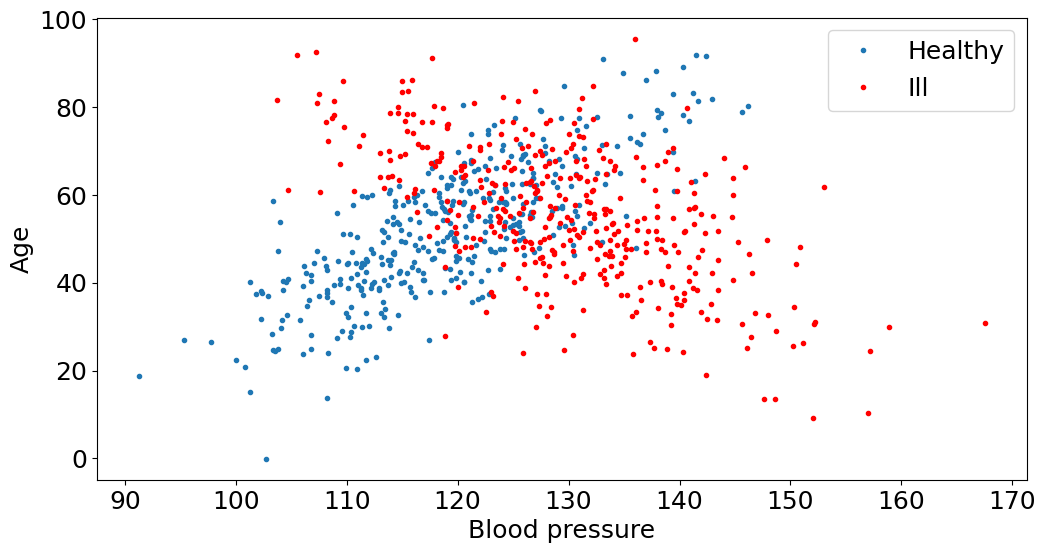

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(control_bloodp[control_status==0],control_age[control_status==0],'.', label = 'Healthy');
ax.plot(control_bloodp[control_status==1],control_age[control_status==1],'.',color = 'red', label = 'Ill');
ax.set_xlabel('Blood pressure')
ax.set_ylabel('Age')
ax.legend()

In [40]:
#From the plots we can see that separating the data according the the A and B category with a fisher projection can work.
#F = w0 + w•x
#w = sum(covariance matrix healthy and covariance matrix sick)^-1*(meanhealthy-meansick)

a = control_temp
b = control_bloodp
c = control_age
sick = control_status


s_cov_AA = np.mean(a[sick==1]*a[sick==1])-np.mean(a[sick==1])*np.mean(a[sick==1])
s_cov_BB = np.mean(b[sick==1]*b[sick==1])-np.mean(b[sick==1])*np.mean(b[sick==1])
s_cov_CC = np.mean(c[sick==1]*c[sick==1])-np.mean(c[sick==1])*np.mean(c[sick==1])
s_cov_AC = np.mean(a[sick==1]*c[sick==1])-np.mean(a[sick==1])*np.mean(c[sick==1])
s_cov_AB = np.mean(b[sick==1]*a[sick==1])-np.mean(b[sick==1])*np.mean(a[sick==1])
s_cov_BC = np.mean(b[sick==1]*c[sick==1])-np.mean(b[sick==1])*np.mean(c[sick==1])

h_cov_AA = np.mean(a[sick==0]*a[sick==0])-np.mean(a[sick==0])*np.mean(a[sick==0])
h_cov_BB = np.mean(b[sick==0]*b[sick==0])-np.mean(b[sick==0])*np.mean(b[sick==0])
h_cov_CC = np.mean(c[sick==0]*c[sick==0])-np.mean(c[sick==0])*np.mean(c[sick==0])
h_cov_AC = np.mean(a[sick==0]*c[sick==0])-np.mean(a[sick==0])*np.mean(c[sick==0])
h_cov_AB = np.mean(b[sick==0]*a[sick==0])-np.mean(b[sick==0])*np.mean(a[sick==0])
h_cov_BC = np.mean(b[sick==0]*c[sick==0])-np.mean(b[sick==0])*np.mean(c[sick==0])

#make the matrices with covariance
M_S = np.array([[s_cov_AA, s_cov_AB, s_cov_AC],[s_cov_AB, s_cov_BB, s_cov_BC], [s_cov_AC, s_cov_BC, s_cov_CC]])
H_S = np.array([[h_cov_AA, h_cov_AB, h_cov_AC],[h_cov_AB, h_cov_BB, h_cov_BC], [h_cov_AC, h_cov_BC, h_cov_CC]])

#make the mean difference vector
s_mA = np.mean(a[sick==1])
s_mB = np.mean(b[sick==1])
s_mC = np.mean(c[sick==1])
h_mA = np.mean(a[sick==0])
h_mB = np.mean(b[sick==0])
h_mC = np.mean(c[sick==0])
#mean_vector = np.array([s_mA - h_mA, s_mB - h_mB])
mean_vector = np.array([h_mA - s_mA, h_mB - s_mB, s_mC - h_mC])

matrix_in = np.linalg.inv(M_S+H_S)
print(f"m_inv {matrix_in.shape}") 
print(f"mean_vector {mean_vector}")
weights = matrix_in.dot(mean_vector)
print(f"weights {weights.shape}")

data_merge = np.asmatrix([a[sick==1],b[sick==1], c[sick==1]]) #Only sick data
print(f"data {data_merge.shape}")

F = np.array(weights.T.dot(data_merge)) 
F2 = F[0,:] #this is just because the format i got out for F cannot be plotted in a histogram
print(F2.shape)

data_merge_h = np.asmatrix([a[sick==0],b[sick==0],c[sick==0]]) #only healthy data
Fh = np.array(weights.T.dot(data_merge_h))
F2h = Fh[0,:]

m_inv (3, 3)
mean_vector [ -1.54040351 -10.14210025   3.32281892]
weights (3,)
data (3, 400)
(400,)


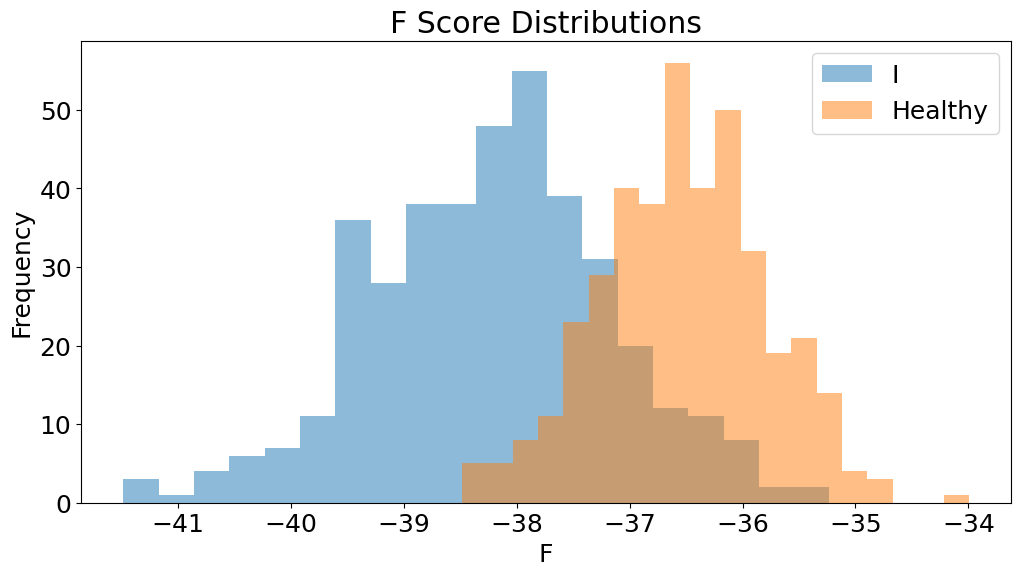

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(F2, bins=20, alpha = 0.5, label='I');
ax.hist(F2h, bins=20, alpha = 0.5, label='Healthy');
ax.set_title('F Score Distributions')
ax.set_xlabel('F')
ax.set_ylabel('Frequency')
ax.legend()

In [42]:
def gauss(x,mu,sigma, N):
	return N*(1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2)))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(F2, bins=20)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F = Minuit(chi2fit,mu=-39, sigma=1, N=50)
minuit_chi2_F.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F.parameters)

minuit_chi2_F.migrad()

#stats.chi2.sf(1,Ndof_value)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.29                      │              Nfcn = 83               │
│ EDM = 1.64e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  -38.19   │   0.05    │            │            │         │         │       │
│ 1 │ sigma │   1.04    │   0.04    │            │            │         │         │       │
│ 2 │ N     │    301    │    15     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        N │
├───────┼────────────────────────────┤
│    mu │  0.00291 8.62e-06  0.00358 │
│ sigma │ 8.62e-06  0.00197    0.016 │
│     N │  0.00358    0.016      237 │
└───────┴────────────────────────────┘

In [43]:
def gauss(x,mu,sigma, N):
	return N*(1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2)))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(F2h, bins=20)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F2 = Minuit(chi2fit,mu=-36.5, sigma=1, N=50)
minuit_chi2_F2.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F2.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F2.parameters)

minuit_chi2_F2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.5                       │              Nfcn = 69               │
│ EDM = 3.55e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  -36.53   │   0.04    │            │            │         │         │       │
│ 1 │ sigma │   0.749   │   0.034   │            │            │         │         │       │
│ 2 │ N     │    220    │    12     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │        mu     sigma         N │
├───────┼───────────────────────────────┤
│    mu │   0.00157 -7.02e-05   0.00327 │
│ sigma │ -7.02e-05   0.00113    0.0314 │
│     N │   0.00327    0.0314       140 │
└───────┴───────────────────────────────┘

0.36239852565573993

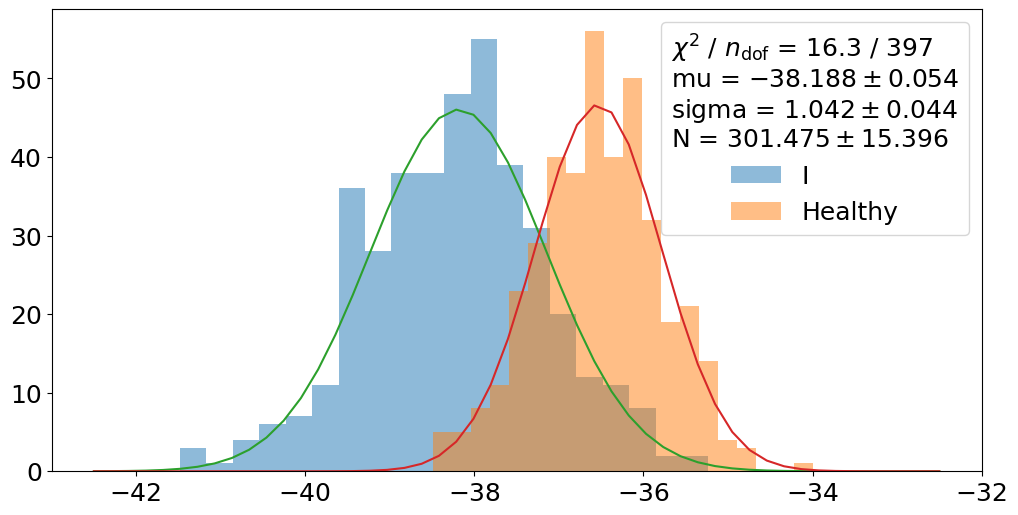

In [44]:
fit_info1 = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F.fval:.1f} / {len(F2) - minuit_chi2_F.nfit}"]
for p, v, e in zip(minuit_chi2_F.parameters, minuit_chi2_F.values, minuit_chi2_F.errors):
	fit_info1.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

fit_info2 = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F2.fval:.1f} / {len(F2h) - minuit_chi2_F2.nfit}"]
for p, v, e in zip(minuit_chi2_F2.parameters, minuit_chi2_F2.values, minuit_chi2_F2.errors):
	fit_info2.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")


x = np.linspace(-42.5,-32.5)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(F2, bins=20, alpha = 0.5, label='I');
ax.hist(F2h, bins=20, alpha = 0.5, label='Healthy');

ax.plot(x, gauss(x,*minuit_chi2_F.values))
ax.plot(x, gauss(x,*minuit_chi2_F2.values))
ax.legend()
ax.legend(title="\n".join(fit_info1));

stats.chi2.sf(16.3,Ndof_value)

# Make Roc curve

In [45]:
def calc_ROC(hist1, hist2):

    # First we extract the entries (y values) and the edges of the histograms:
    # Note how the "_" is simply used for the rest of what e.g. "hist1" returns (not really of our interest)
    y_sig, x_sig_edges = hist1 
    y_bkg, x_bkg_edges = hist2
    
    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges) :
        
        # Extract the center positions (x values) of the bins (both signal or background works - equal binning)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])
        
        # Calculate the integral (sum) of the signal and background:
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()
    
        # Initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR):
        TPR = np.zeros_like(y_sig, dtype=float) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig, dtype=float) # False positive rate ()
        
        # Loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin:
        for i, x in enumerate(x_centers): 
            
            # The cut mask
            cut = (x_centers < x)
            cutinv = (x_centers > x)
            
            # True positive
            TP = np.sum(y_sig[cutinv]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            tpp = TP / (TP + FN)                    # True positive rate
            TPR[i] = tpp
            

            # True negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[cutinv]) / integral_bkg     # False positives
            FPR[i] = FP / (FP + TN)                     # False positive rate            
            
    return FPR, TPR

In [46]:
TPR_F, FPR_F = calc_ROC(np.histogram(F2, bins = 40, range=(-42,-34)), np.histogram(F2h, bins = 40, range=(-42,-34)))
TPR_temp, FPR_temp = calc_ROC(np.histogram(control_temp[control_status==0], bins = 40, range=(34,41)), np.histogram(control_temp[control_status==1], bins = 40, range=(34,41)))
TPR_bloodp, FPR_bloodp = calc_ROC(np.histogram(control_bloodp[control_status==0], bins = 40, range=(90,170)), np.histogram(control_bloodp[control_status==1], bins = 40, range=(90,170)))
TPR_age, FPR_age = calc_ROC(np.histogram(control_age[control_status==0], bins = 40, range=(0,100)), np.histogram(control_age[control_status==1], bins = 40, range=(0,100)))

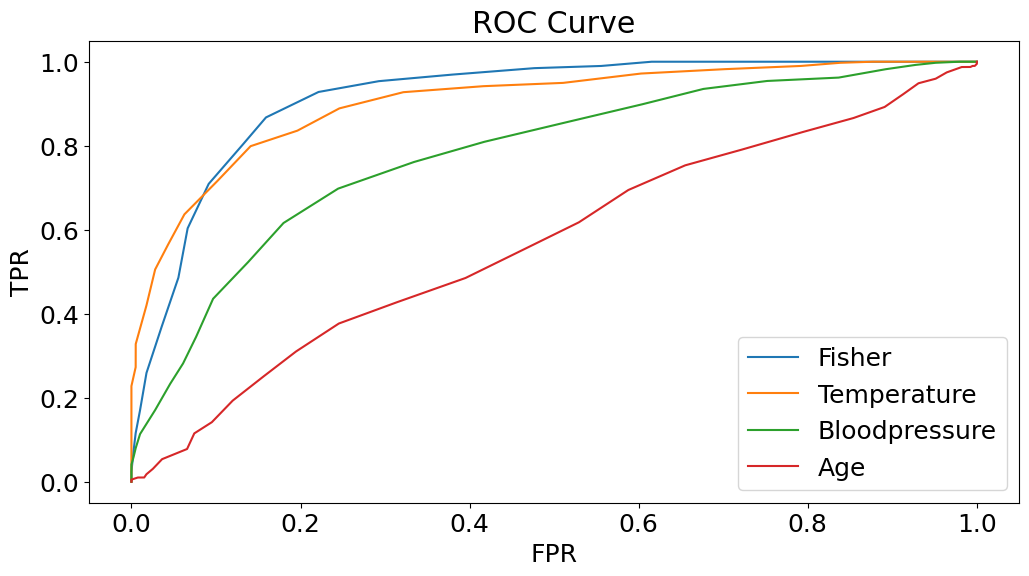

In [47]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(FPR_F, TPR_F, label = 'Fisher')
ax.plot(FPR_temp, TPR_temp, label = 'Temperature')
ax.plot(FPR_bloodp, TPR_bloodp, label = 'Bloodpressure')
ax.plot(FPR_age, TPR_age, label = 'Age')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC Curve')
ax.legend()

In [48]:
np.flatnonzero(0.90<FPR_F)
print(FPR_F[22], TPR_F[22])
print(f'Our cutoff point is {F2[22]} and we then have {np.sum(F2[22:])}')

0.22133333333333333 0.9279999999999999
Our cutoff point is -39.52840647922322 and we then have -14445.42578533701


/var/folders/63/gwq1zc2x00j6dxvm9c1j0rbm0000gn/T/ipykernel_43801/1598093066.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1-FPR_F, TPR_F/np.sqrt(FPR_F), label = 'Fisher')
/var/folders/63/gwq1zc2x00j6dxvm9c1j0rbm0000gn/T/ipykernel_43801/1598093066.py:2: RuntimeWarning: invalid value encountered in divide
  ax.plot(1-FPR_F, TPR_F/np.sqrt(FPR_F), label = 'Fisher')


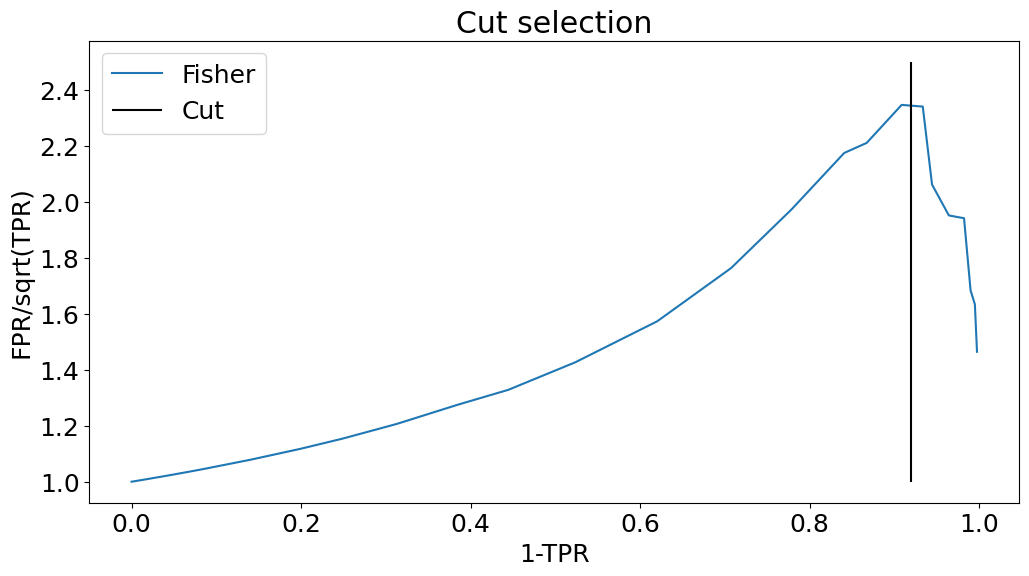

In [49]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(1-FPR_F, TPR_F/np.sqrt(FPR_F), label = 'Fisher')
ax.set_title('Cut selection')
ax.set_xlabel('1-TPR')
ax.set_ylabel('FPR/sqrt(TPR)')
ax.vlines(0.92, 1, 2.5, color = 'black', label = 'Cut')
ax.legend();

weights (3,)
data (3, 199)
[-0.89728091 -0.03027397  0.00093341]


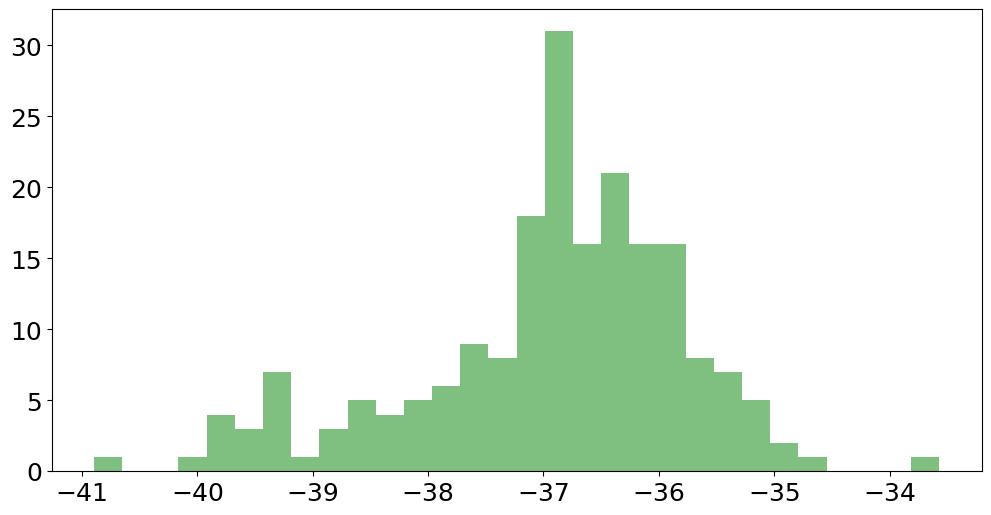

In [50]:
a = unknown_temp
b = unknown_bloodp
c = unknown_age

weights = matrix_in.dot(mean_vector)
print(f"weights {weights.shape}")

data_merge = np.asmatrix([a,b,c]) #Only sick data
print(f"data {data_merge.shape}")

F_unknown = np.array(weights.T.dot(data_merge)) 
F_unknown = F_unknown[0,:]

fig, ax = plt.subplots(figsize = (12,6))
plt.hist(F_unknown, alpha = 0.5 ,bins = 30, color = 'green');

print(weights)

0.36239852565573993

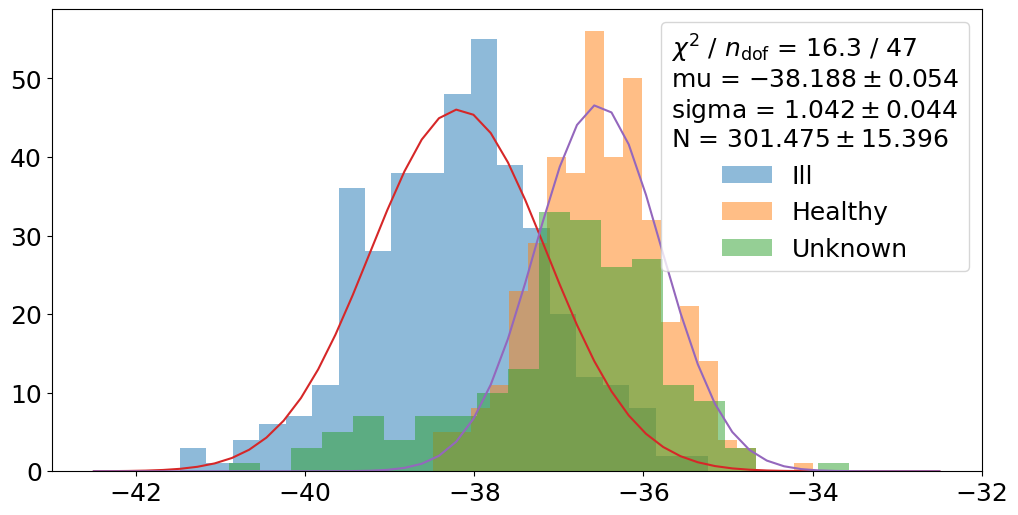

In [51]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F.fval:.1f} / {len(x) - minuit_chi2_F.nfit}"]
for p, v, e in zip(minuit_chi2_F.parameters, minuit_chi2_F.values, minuit_chi2_F.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(-42.5,-32.5)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(F2, bins=20, alpha = 0.5, label='Ill');
ax.hist(F2h, bins=20, alpha = 0.5, label='Healthy');
ax.hist(F_unknown, bins=20, alpha = 0.5, label='Unknown');

ax.plot(x, gauss(x,*minuit_chi2_F.values))
ax.plot(x, gauss(x,*minuit_chi2_F2.values))
ax.legend()
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(16.3,Ndof_value)

0.36239852565573993

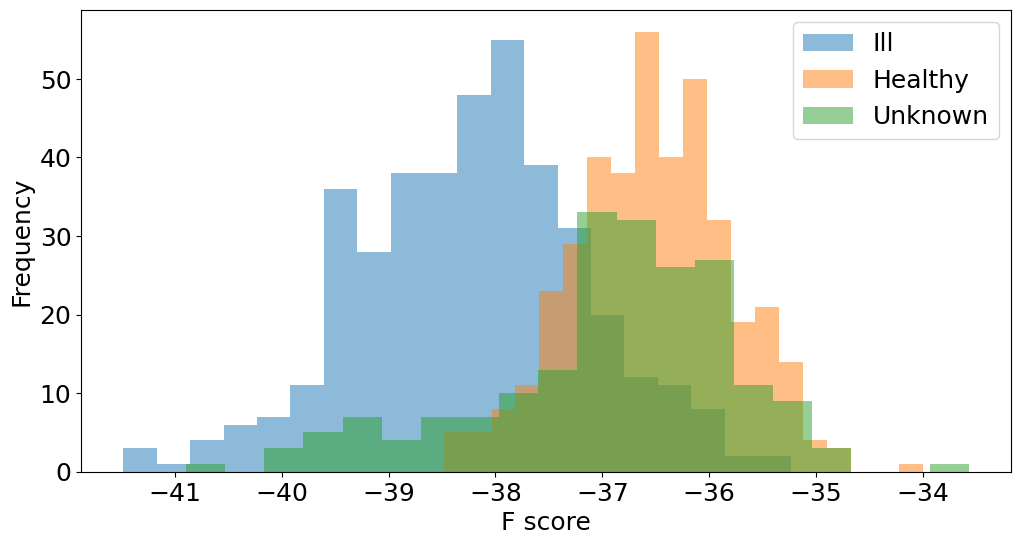

In [52]:


x = np.linspace(-42.5,-32.5)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(F2, bins=20, alpha = 0.5, label='Ill');
ax.hist(F2h, bins=20, alpha = 0.5, label='Healthy');
ax.hist(F_unknown, bins=20, alpha = 0.5, label='Unknown');
ax.set_xlabel('F score')
ax.set_ylabel('Frequency')

ax.legend()

stats.chi2.sf(16.3,Ndof_value)

In [53]:
np.sum(F_unknown>-39)
#np.sum(F_unknown<-39)

182

# 4.2

In [54]:
def read_grip(filename):
	dat = pd.read_csv(filename, sep = ',', header = 0, names = ["Country", "GDP", "Popsize", "Happiness-index", "Economic-freedom-index","Press-freedom-index", "Education-index"]) 
	return dat

Country = read_grip("data_CountryScores.csv")
country = Country["Country"]
gdp = Country["GDP"]
popsize = Country["Popsize"]
happiness = Country["Happiness-index"]
econ_freedom = Country["Economic-freedom-index"]
press_freedom = Country["Press-freedom-index"]
edu_freedom  = Country["Education-index"]


## 4.2.1

In [55]:
import statistics
print(f"The mean of the GDP is {np.mean(gdp)}, the median is {statistics.median(gdp)}, the 25% quantile is {np.quantile(gdp, .25)}, and the 75% quantile is {np.quantile(gdp, .75)}")

The mean of the GDP is 17362.045112781954, the median is 6677.0, the 25% quantile is 2047.0, and the 75% quantile is 23762.0


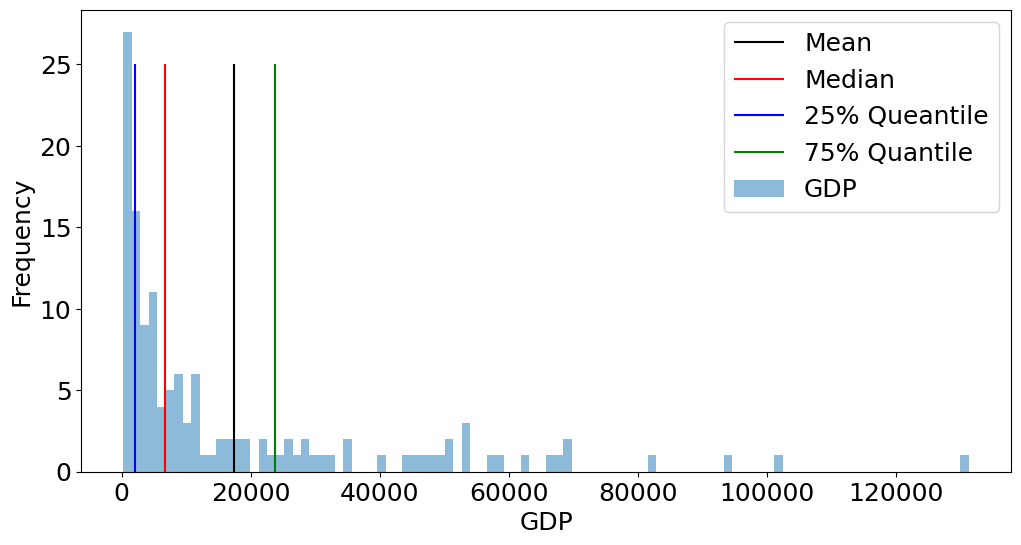

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(np.mean(gdp),0,25, label = 'Mean', color = 'black')
ax.vlines(statistics.median(gdp),0,25, label = 'Median', color = 'red')
ax.vlines(np.quantile(gdp, .25),0,25, label = '25% Queantile', color = 'blue')
ax.vlines(np.quantile(gdp, .75),0,25, label = '75% Quantile', color = 'green')
ax.hist(gdp, bins = 100, alpha = 0.5, label = 'GDP');
ax.set_xlabel('GDP')
ax.set_ylabel('Frequency')
plt.legend()

In [98]:
np.sqrt(len(gdp))/np.sqrt(len(gdp))

1.0

In [57]:
def gauss(x,tau,N):
	return N*(np.exp(-x/tau))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(gdp, bins=100)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F2 = Minuit(chi2fit,tau = 40, N=500)
minuit_chi2_F2.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F2.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F2.parameters)

minuit_chi2_F2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 45.45                      │              Nfcn = 217              │
│ EDM = 7.95e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   5.6e3   │   1.2e3   │            │            │         │         │       │
│ 1 │ N    │    22     │     5     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────┐
│     │       tau         N │
├─────┼─────────────────────┤
│ tau │  1.49e+06 -5.85e+03 │
│   N │ -5.85e+03      28.3 │
└─────┴─────────────────────┘

0.29370214721432203

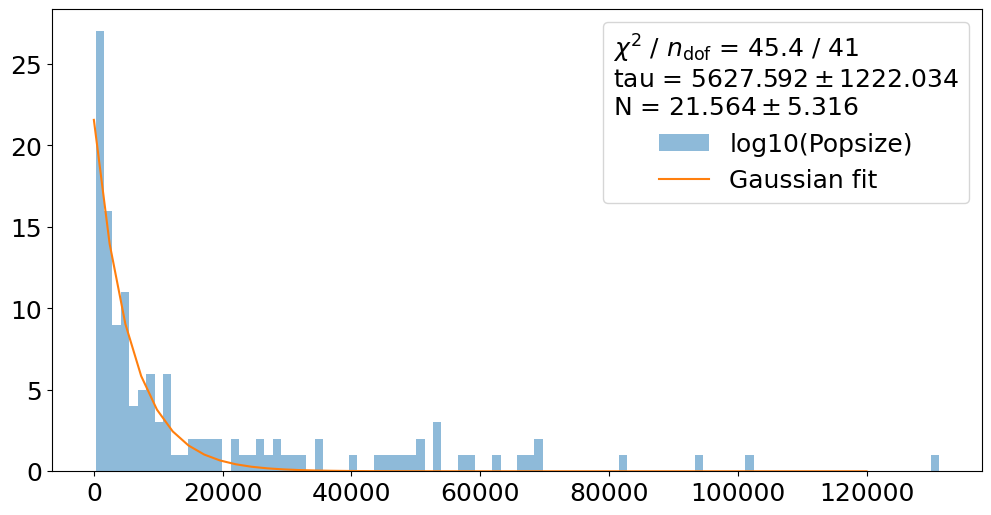

In [58]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F2.fval:.1f} / {len(x) - minuit_chi2_F2.nfit}"]
for p, v, e in zip(minuit_chi2_F2.parameters, minuit_chi2_F2.values, minuit_chi2_F2.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
x = np.linspace(0,120000)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(gdp, bins=100, alpha = 0.5, label='log10(Popsize)');
ax.plot(x, gauss(x,*minuit_chi2_F2.values), label = 'Gaussian fit')
ax.legend()
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(45.4,Ndof_value)

use tranformation method to simulate data and calculate uncertainties

## 4.2.2

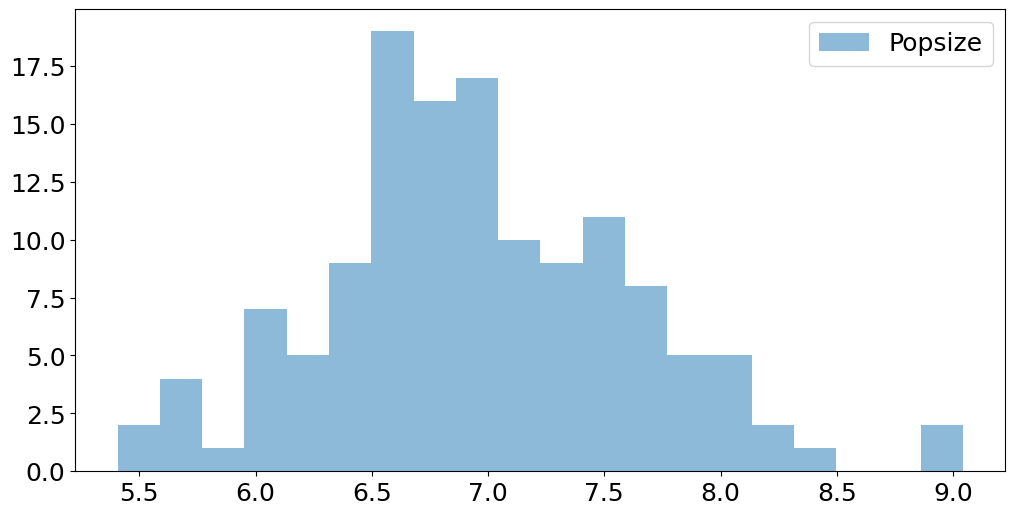

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(np.log10(popsize) , bins = 20, alpha = 0.5, label = 'Popsize');
plt.legend()

In [60]:
def gauss(x,mu,sigma, N):
	return N*(1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2)))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(np.log10(popsize), bins=20)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F2 = Minuit(chi2fit,mu=7, sigma=1, N=50)
minuit_chi2_F2.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F2.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F2.parameters)

minuit_chi2_F2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.65                      │              Nfcn = 69               │
│ EDM = 2.14e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   6.99    │   0.06    │            │            │         │         │       │
│ 1 │ sigma │   0.62    │   0.05    │            │            │         │         │       │
│ 2 │ N     │    54     │     5     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        N │
├───────┼────────────────────────────┤
│    mu │  0.00378 0.000807  0.00678 │
│ sigma │ 0.000807  0.00288   0.0209 │
│     N │  0.00678   0.0209     25.1 │
└───────┴────────────────────────────┘

0.4022651355702279

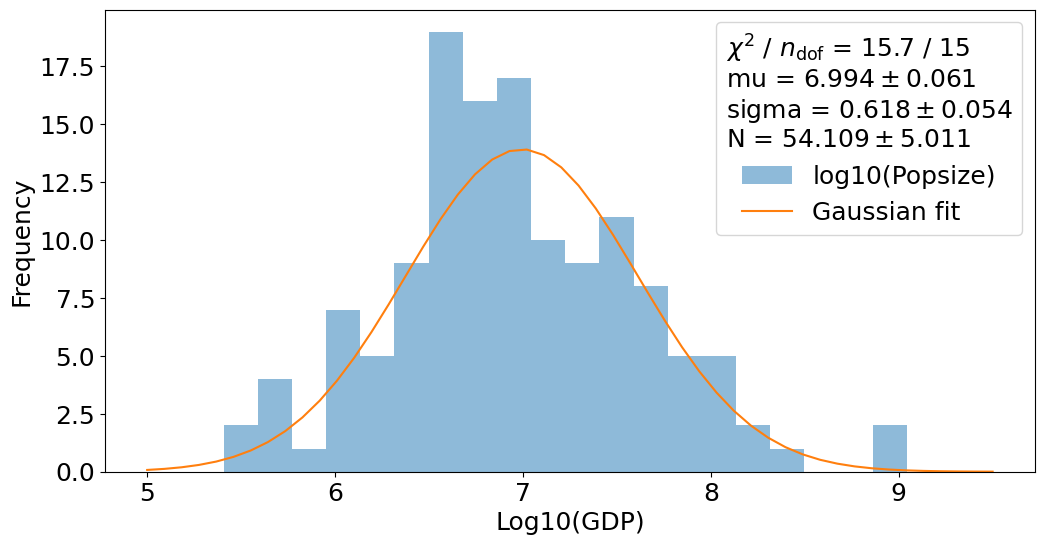

In [61]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F2.fval:.1f} / {len(x) - minuit_chi2_F2.nfit}"]
for p, v, e in zip(minuit_chi2_F2.parameters, minuit_chi2_F2.values, minuit_chi2_F2.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(5,9.5)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(np.log10(popsize), bins=20, alpha = 0.5, label='log10(Popsize)');
ax.plot(x, gauss(x,*minuit_chi2_F2.values), label = 'Gaussian fit')
ax.legend()
ax.set_xlabel('Log10(GDP)')
ax.set_ylabel('Frequency')
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(15.7,Ndof_value)

## 4.2.3

In [62]:
print(stats.pearsonr(happiness,edu_freedom))
print(stats.spearmanr(happiness,edu_freedom))

PearsonRResult(statistic=0.7647440306793953, pvalue=8.91736545435073e-27)
SpearmanrResult(correlation=0.8043593869327467, pvalue=2.065314967435993e-31)


The pearson test measures the linear correlation between happiness and education, The spearman test measures the degree of association between happiness and education

## 4.2.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


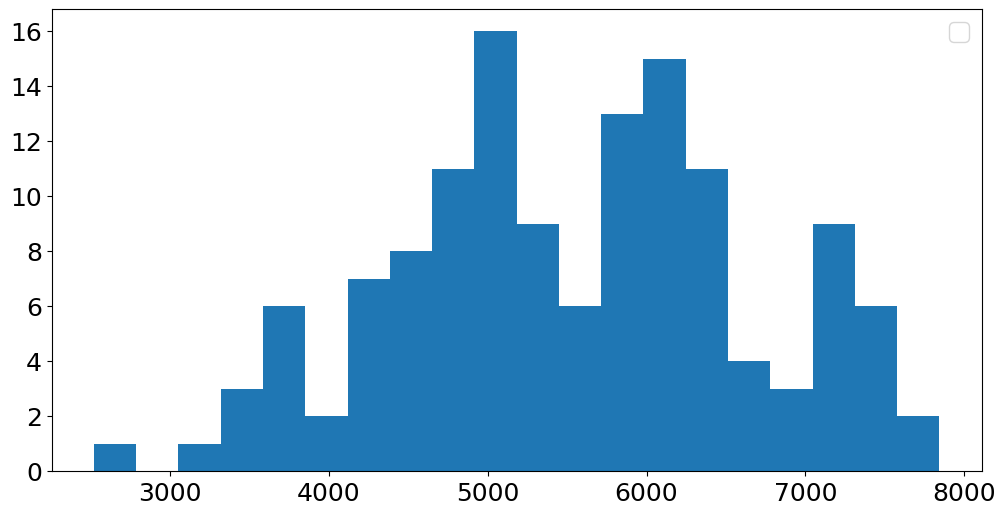

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(happiness,bins=20)

ax.legend()

In [64]:
def third_fit(x,a,N):
    return  N*(x**a)

m = Chi2Regression(third_fit, gdp, happiness)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

m = Minuit(m,a =0.1, N = 5000)
m.errordef = 1.0     # This is the definition for ChiSqaure fits
m.migrad()
m.hesse()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.431e+07                  │              Nfcn = 87               │
│ EDM = 1.74e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │113.721e-3 │ 0.011e-3  │            │            │         │         │       │
│ 1 │ N    │ 2.00761e3 │ 0.00020e3 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         N │
├───┼─────────────────────┤
│ a │  1.15e-10 -2.15e-06 │
│ N │ -2.15e-06    0.0411 │
└───┴─────────────────────┘

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


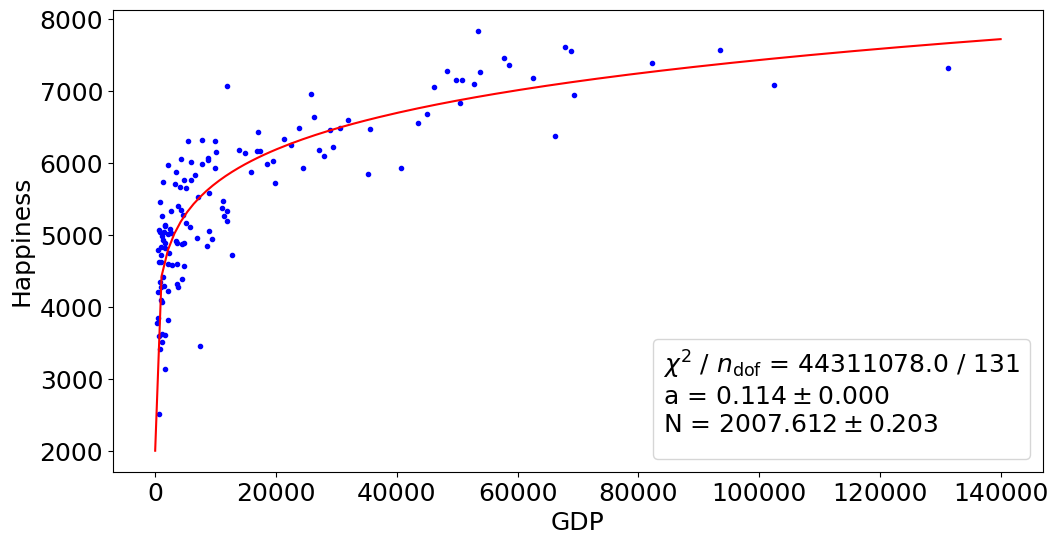

In [65]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(gdp) - m.nfit}"]
for p, v, e in zip(m.parameters, m.values, m.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(1,140000, 133)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(gdp, happiness, '.', color = 'Blue')
ax.plot(x, third_fit(x, *m.values), color = 'Red')
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness')
ax.legend(title="\n".join(fit_info));

Text(0, 0.5, 'Frequency')

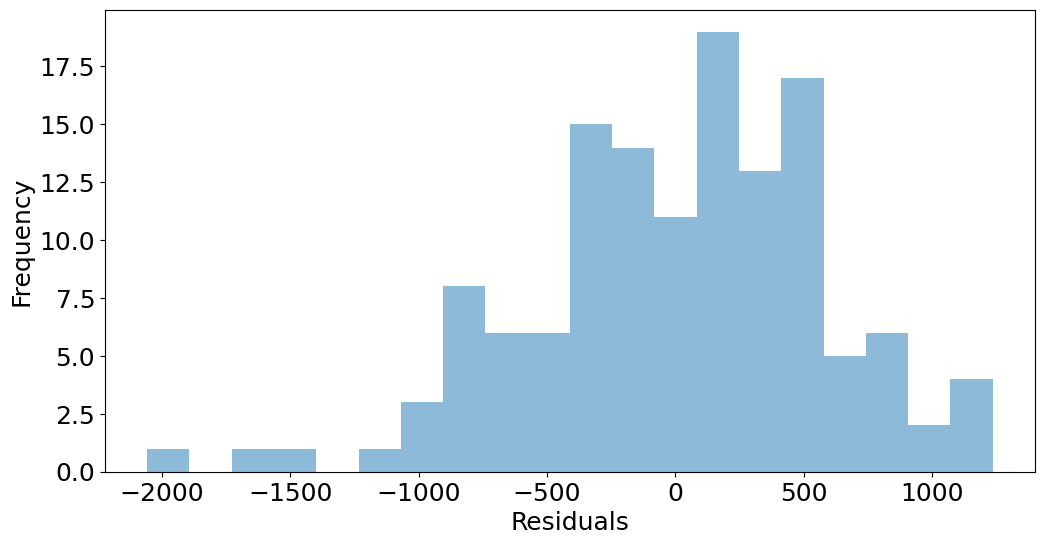

In [66]:
res = happiness-third_fit(gdp, *m.values)

fig, ax = plt.subplots(figsize=(12, 6))
#ax.plot(x, res, '.', color = 'Blue')
ax.hist(res, bins = 20, alpha = 0.5);
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')


In [67]:
def gauss(x,mu,sigma, N):
	return N*(1/(sigma*2*np.pi)*np.exp(-(x-mu)**2/(2*sigma**2)))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(res, bins=20)
x = (bin_edges[1:] + bin_edges[:-1])/2
y = counts
sy = np.sqrt(counts)
x = x[y>0]
sy = sy[y>0]
y = y[y>0]

chi2fit = Chi2Regression(gauss, x, y, sy)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2_F2 = Minuit(chi2fit,mu=0, sigma=100, N=500)
minuit_chi2_F2.errordef = 1.0     # This is the definition for ChiSqaure fits

chi2_value = minuit_chi2_F2.fval
N_NotEmptyBin = np.sum(y>0)
Ndof_value = N_NotEmptyBin - len(minuit_chi2_F2.parameters)

minuit_chi2_F2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.03                      │              Nfcn = 129              │
│ EDM = 3.97e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    30     │    50     │            │            │         │         │       │
│ 1 │ sigma │    550    │    50     │            │            │         │         │       │
│ 2 │ N     │   50e3    │    5e3    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        N │
├───────┼────────────────────────────┤
│    mu │ 2.96e+03     -169 3.75e+03 │
│ sigma │     -169 2.77e+03 2.95e+04 │
│     N │ 3.75e+03 2.95e+04 2.13e+07 │
└───────┴────────────────────────────┘

0.4514172112257256

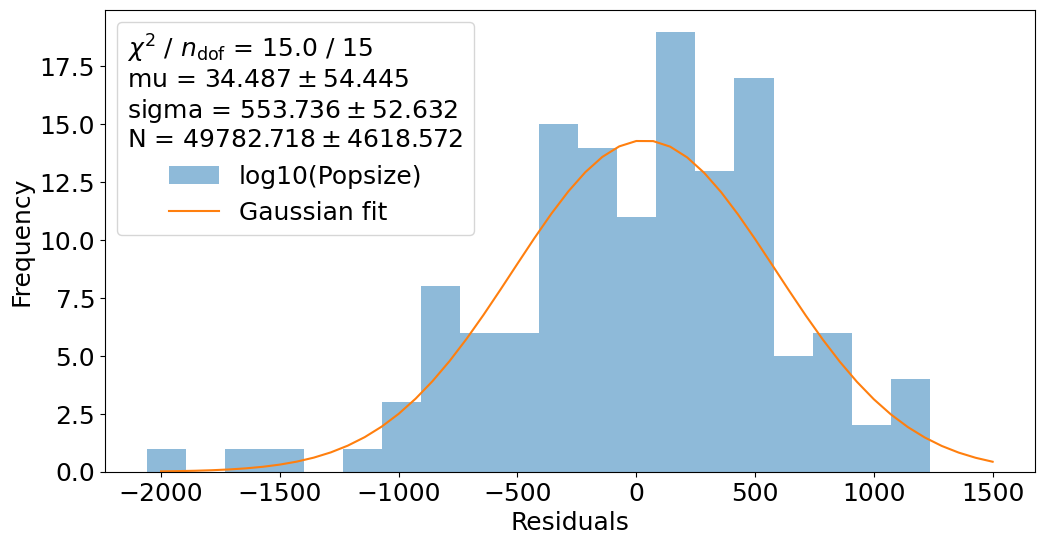

In [68]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minuit_chi2_F2.fval:.1f} / {len(x) - minuit_chi2_F2.nfit}"]
for p, v, e in zip(minuit_chi2_F2.parameters, minuit_chi2_F2.values, minuit_chi2_F2.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(-2000,1500)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(res, bins=20, alpha = 0.5, label='log10(Popsize)');
ax.plot(x, gauss(x,*minuit_chi2_F2.values), label = 'Gaussian fit')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.legend()
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(15,Ndof_value)

The unvertainty on the happiness is thus 555.3 +- 52

### runs test on res

In [69]:

def ww_runs(pos,neg,tot):

	mu = 2*pos*neg/tot + 1

	var = 2*pos*neg*(2*pos*neg-tot)/(tot**2*(tot-1))

	return mu, np.sqrt(var)

Npos = []
Nneg = []

for i in res:
	if i > 0:
		Npos.append(i)
	else:
		Nneg.append(i)

Npos = np.array(Npos)
Nneg = np.array(Nneg)
Ntot = len(Npos) + len(Nneg)

n_runs = 0

if res[0] > 0:
    run_positive = True
else:
    run_positive = False

for i in range(len(res)):
    if run_positive :
        if res[i] < 0:
            run_positive = False
            n_runs += 1
    else :
        if res[i] > 0:
            run_positive = True
            n_runs += 1

print(f'The number of runs observed is {n_runs}')
print(f'The number of expected runs with its uncertainty is {ww_runs(len(Npos),len(Nneg),Ntot)}')

The number of runs observed is 70
The number of expected runs with its uncertainty is (67.19548872180451, 5.717892729020141)


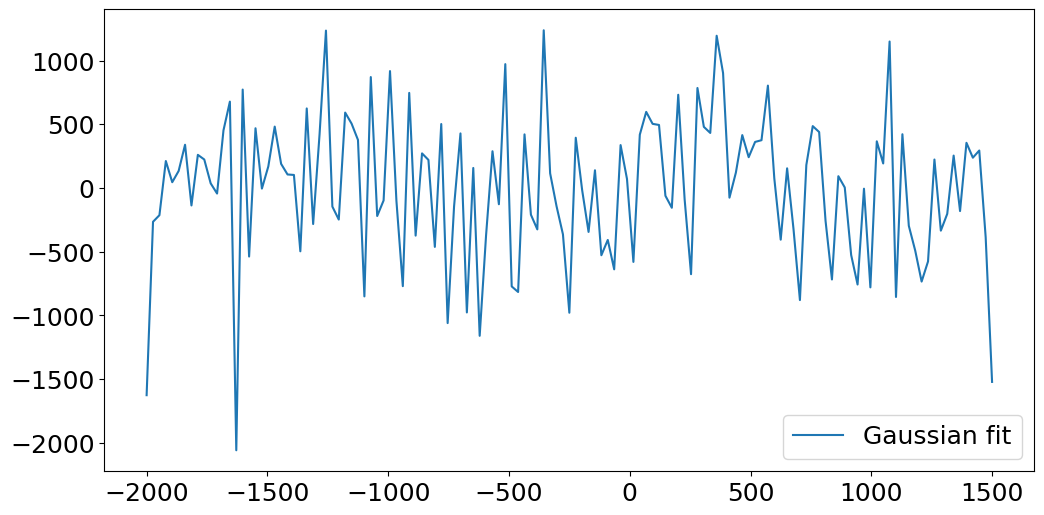

In [70]:
x = np.linspace(-2000,1500, 133)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, res, label = 'Gaussian fit')
ax.legend()

In [71]:
def third_fit(x,a,N):
    return  N*(x**a)

m = Chi2Regression(third_fit, gdp, happiness, 550)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

m = Minuit(m,a =0.1, N = 5000)
m.errordef = 1.0     # This is the definition for ChiSqaure fits
m.migrad()
m.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 146.5                      │              Nfcn = 83               │
│ EDM = 0.000115 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.114   │   0.006   │            │            │         │         │       │
│ 1 │ N    │  2.01e3   │  0.11e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        N │
├───┼───────────────────┤
│ a │ 3.44e-05   -0.643 │
│ N │   -0.643 1.23e+04 │
└───┴───────────────────┘

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.16776222094880808

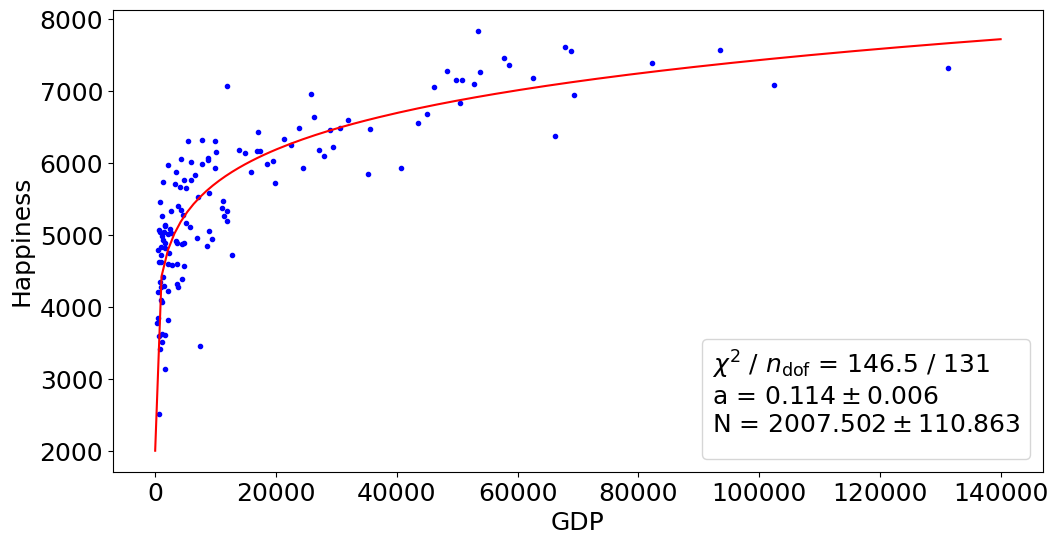

In [72]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x) - m.nfit}"]
for p, v, e in zip(m.parameters, m.values, m.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    
x = np.linspace(1,140000, 133)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(gdp, happiness, '.', color = 'Blue')
ax.plot(x, third_fit(x, *m.values), color = 'Red')
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness')
ax.legend(title="\n".join(fit_info));

stats.chi2.sf(146.5,131)

# Problem 5 - Fitting data

In [73]:
def read_grip(filename):
	dat = pd.read_csv(filename, sep = ',', header = 0, names = ["Area", "sigArea", "Volume", "sigVolume"]) 
	return dat

Glacier = read_grip("data_GlacierSizes.csv")
area = Glacier["Area"]
area_sig = Glacier["sigArea"]
volume = Glacier["Volume"]
volume_sig = Glacier["sigVolume"]


## 5.1.1

Text(0, 0.5, 'Volume')

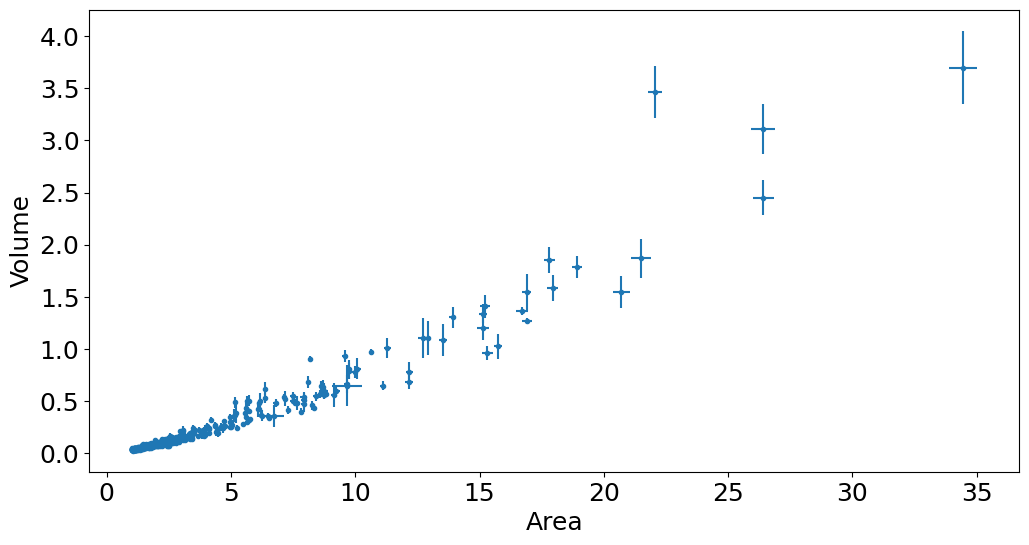

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(area,volume, xerr=area_sig, yerr=volume_sig, fmt='.')
ax.set_xlabel('Area')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

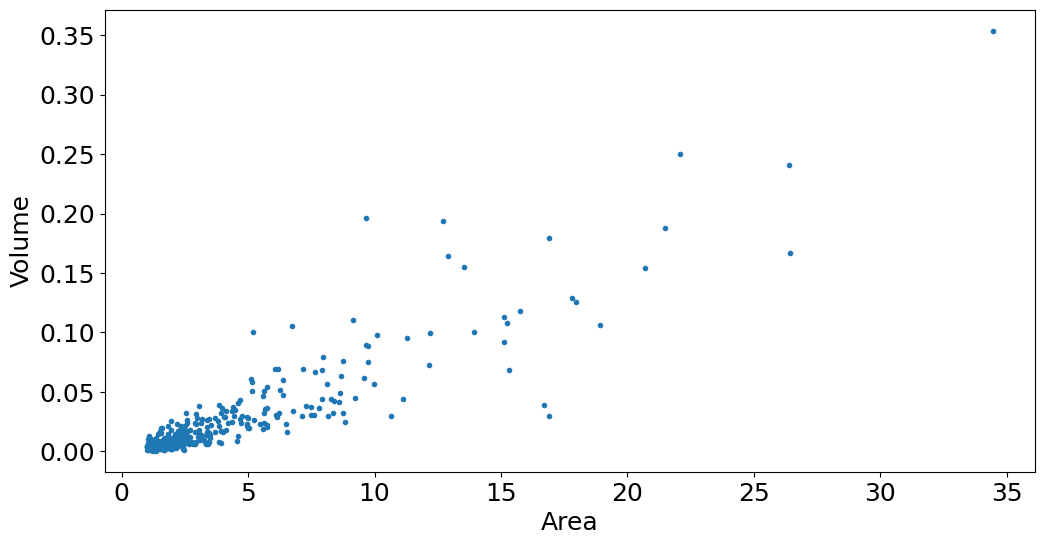

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(area,volume_sig, '.')
ax.set_xlabel('Area')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

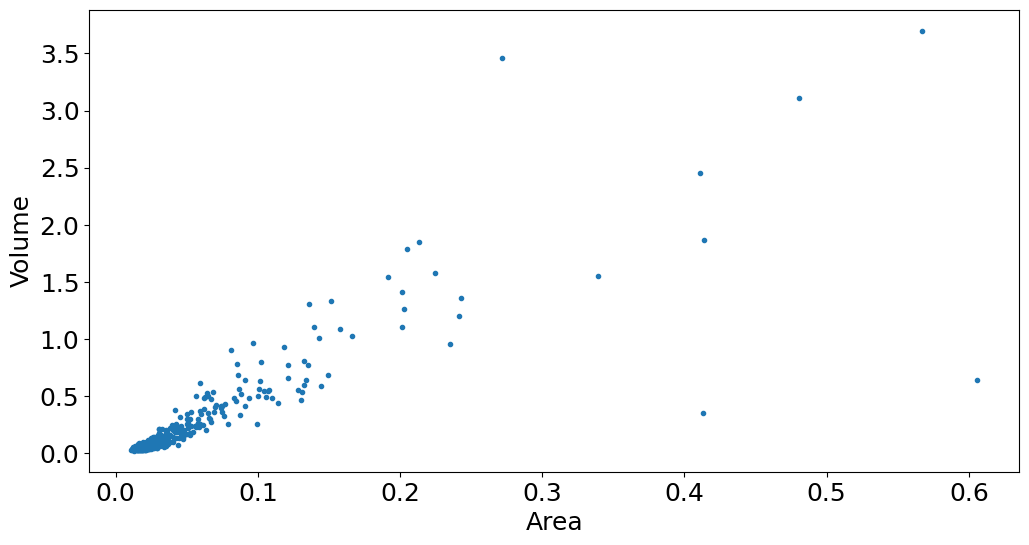

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(area_sig,volume, '.')
ax.set_xlabel('Area')
ax.set_ylabel('Volume')

It is clear to see that the volume has the largest error

## 5.1.2

In [76]:
def relation_or(A,N):
    return N*A**(3/2)

m5 = Chi2Regression(relation_or, area, volume, volume_sig)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

m5 = Minuit(m5, N=0.1)
m5.errordef = 1.0     # This is the definition for ChiSqaure fits
m5.migrad()
m5.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4265                       │              Nfcn = 20               │
│ EDM = 2.04e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │ 25.22e-3  │  0.08e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        N │
├───┼──────────┤
│ N │ 6.48e-09 │
└───┴──────────┘

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


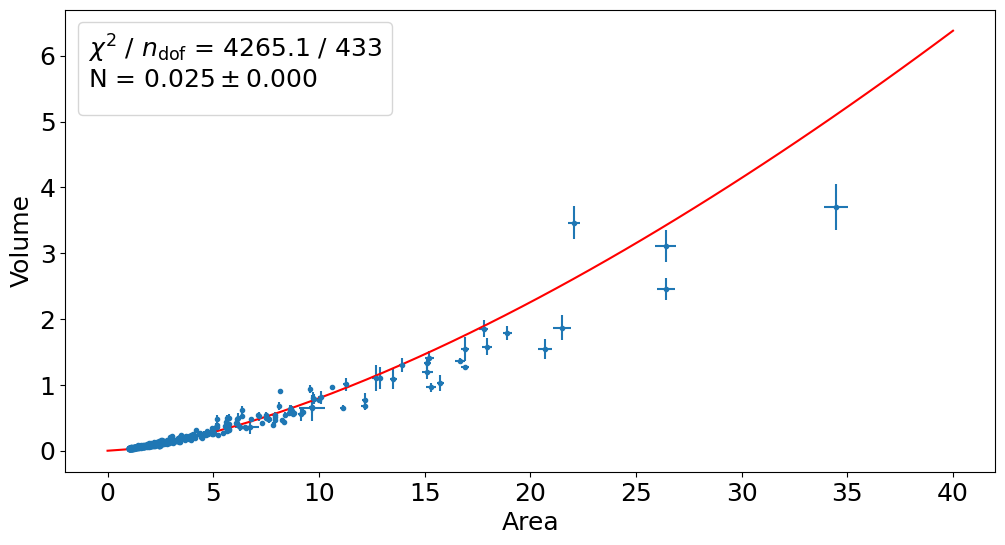

In [77]:
fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m5.fval:.1f} / {len(area) - m5.nfit}",]
for p, v, e in zip(m5.parameters, m5.values, m5.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(0,40)
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(area,volume, xerr=area_sig, yerr=volume_sig, fmt='.')
ax.plot(x, relation_or(x, *m5.values), color = 'Red')
ax.set_ylabel('Volume')
ax.set_xlabel('Area')
ax.legend(title="\n".join(fit_info));

## 5.1.3

No i am not satisfied, this is a bad fit - EXPLAIN WHY !

## 5.1.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


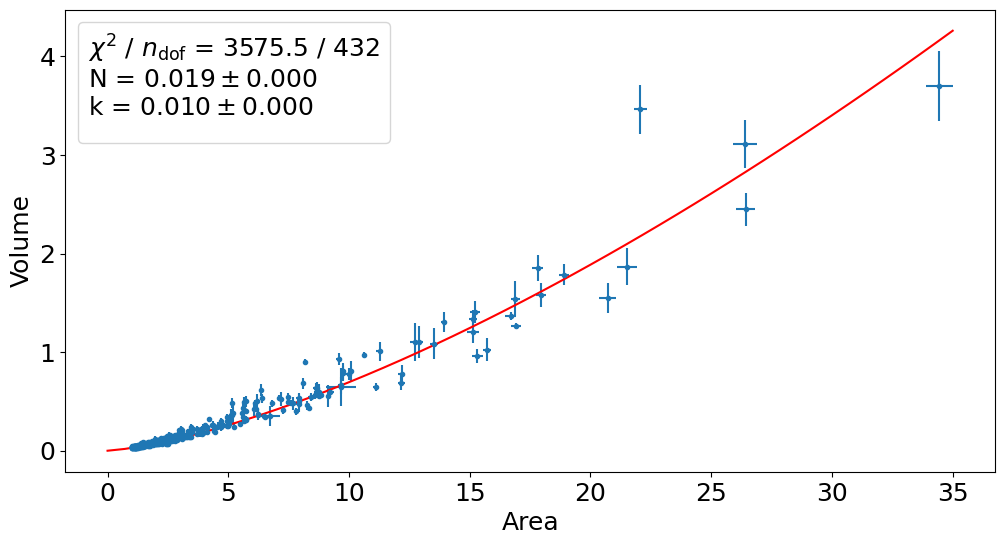

In [78]:
def relation_imp(A,N,k):
    return N*A**(3/2)+k*A

m = Chi2Regression(relation_imp, area, volume,volume_sig)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

m = Minuit(m, N=1, k = 1)
m.errordef = 1.0     # This is the definition for ChiSqaure fits
m.migrad()
m.hesse()

fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(area) - m.nfit}",]
for p, v, e in zip(m.parameters, m.values, m.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(0,35)
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(area,volume, xerr=area_sig, yerr=volume_sig, fmt='.')
ax.plot(x, relation_imp(x, *m.values), color = 'Red')
ax.set_ylabel('Volume')
ax.set_xlabel('Area')
ax.legend(title="\n".join(fit_info));


In [79]:
np.sqrt(4265-3575)

26.267851073127396

## 5.1.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


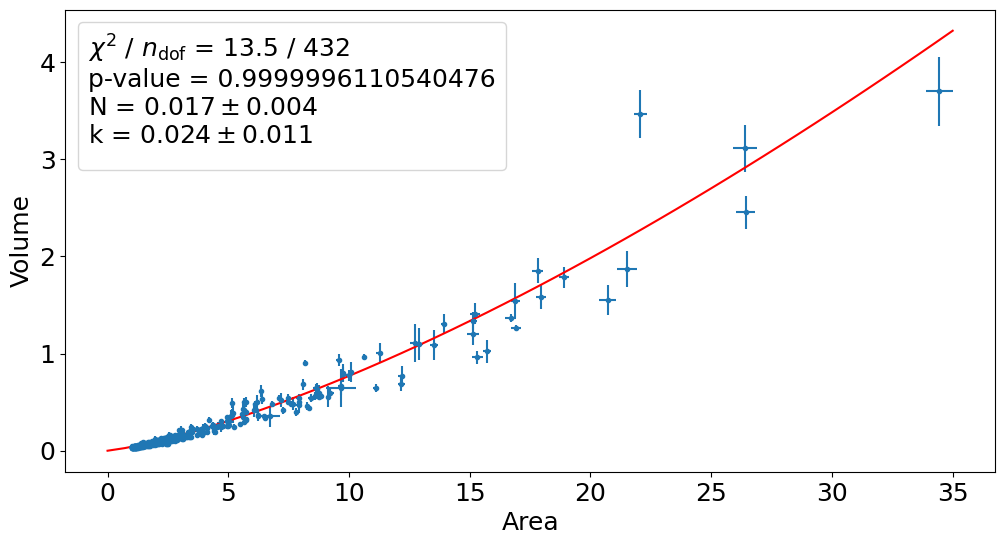

In [80]:
def relation(A,N,k):
    return N*A**(3/2)+k*A

m = Chi2Regression(relation, area, volume, area_sig ,volume_sig)
# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

m = Minuit(m, N=0.1, k = 0.1)
m.errordef = 1.0     # This is the definition for ChiSqaure fits
m.migrad()
m.hesse()

fit_info = [f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(area) - m.nfit}",f"p-value = {stats.chi2.sf(14,48)}"]
for p, v, e in zip(m.parameters, m.values, m.errors):
	fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

x = np.linspace(0,35)
fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(area,volume, xerr=area_sig, yerr=volume_sig, fmt='.')
ax.plot(x, relation(x, *m.values), color = 'Red')
ax.set_ylabel('Volume')
ax.set_xlabel('Area')
ax.legend(title="\n".join(fit_info));


Beta: [0.02011573 0.00963946]
Beta Std Error: [0.00069367 0.00101581]
Beta Covariance: [[ 8.24629683e-08 -1.13836732e-07]
 [-1.13836732e-07  1.76841290e-07]]
Residual Variance: 5.835014531003308
Inverse Condition #: 0.15488393161521885
Reason(s) for Halting:
  Sum of squares convergence


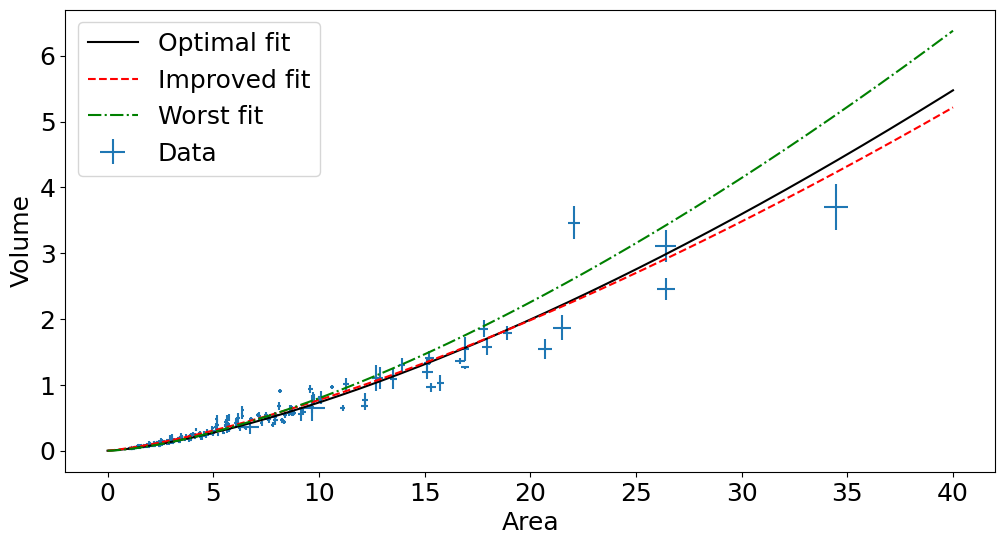

In [81]:
from scipy.odr import *

def relation(p,A):
	N,k = p
	return N*A**(3/2)+k*A


# Create a model for fitting.
quad_model = Model(relation)

# Create a RealData object using our initiated data from above.
data = RealData(area, volume, sx=area_sig, sy=volume_sig)

# Set up ODR with the model and data.
odr = ODR(data, quad_model, beta0=[1, 1])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

x_fit = np.linspace(0, 40, 1000)
y_fit = relation(out.beta, x_fit)

fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(area, volume, xerr=area_sig, yerr=volume_sig, linestyle='None', label = 'Data')
ax.set_xlabel('Area')
ax.set_ylabel('Volume')
ax.plot(x_fit, y_fit, label = 'Optimal fit', color = 'black')
ax.plot(x_fit, relation_imp(x_fit, *m.values), color = 'Red', linestyle = 'dashed', label = 'Improved fit')
ax.plot(x_fit, relation_or(x_fit, *m5.values), color = 'green',linestyle = 'dashdot', label='Worst fit')
ax.legend()

In [91]:
#The chi2 and p-value for the optimal fit is 
def chi2_self(obs, exp, sig):
	return np.sum(((obs-exp)/sig)**2)

stats.chi2.sf(5.835014531003308, 432)

1.0

## 5.1.6

Do errorpropagation on relation formula and insert Beta error

In [84]:
def error_prob(a,n,k,sig_a,sig_n, sig_k):
	return (a**(3/2))**2*sig_n**2 + a**2*sig_k**2+((3*np.sqrt(3)*n/2)+k)**2*sig_a

print(f'The volume of a glacier with area 0.5km^2 is ({relation([0.02011573, 0.00963946],0.5)} +- {error_prob(0.5,0.02011573,0.00963946,np.mean(area_sig),0.00069367,0.00101581)}) km^3')



The volume of a glacier with area 0.5km^2 is (0.011931714545758835 +- 0.00018960635511666927) km^3
